# **Курсовая работа по дисциплине «Методология и инструменты анализа данных»**
### **«Анализ данных о работе проекта "Умная кафедра" (датчики движения и открытия)»**
### **Богачёва Анастасия Юрьевна, КБ-211**

### *1. Предварительный анализ и очистка данных*

Импортируем необходимые библиотеки

In [439]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import probplot

#### Для начала подключаемся к базе данных

Указываем параметры соединения с базой данных MySQL

In [440]:
db_host = '127.0.0.1'
db_user = 'root'
db_password = 'root'
db_name = 'homeassistant'

Формируем строку подключения

In [441]:
connection_str = f"mysql+pymysql://{db_user}:{db_password}@{db_host}/{db_name}"

Создаем соединение с базой данных


In [442]:
engine = create_engine(connection_str)

 Указываем SQL-запрос

In [443]:
sql_query = 'SELECT * FROM states'

Читаем данные из MySQL и загружаем их в DataFrame

In [444]:
df = pd.read_sql(sql_query, engine)

Выводим DataFrame

In [445]:
print(df)


         state_id                                          entity_id  \
0          991389        sensor.wireless_router_archer_c7_b_received   
1          991390            sensor.wireless_router_archer_c7_b_sent   
2          991391  sensor.wireless_router_archer_c7_packets_received   
3          991392      sensor.wireless_router_archer_c7_packets_sent   
4          991393  sensor.wireless_router_archer_c7_packets_s_rec...   
...           ...                                                ...   
9185804  10177193                                            sun.sun   
9185805  10177194                     binary_sensor.rpi_power_status   
9185806  10177195                                            sun.sun   
9185807  10177196                     binary_sensor.rpi_power_status   
9185808  10177197                                            sun.sun   

                 state attributes event_id               last_changed  \
0             88899264       None     None                    

#### Предварительный анализ

Для того, чтобы провести анализ, выведем уникальные значения датчиков, чтобы понять какие датчики присутствуют

In [446]:
unique_entity_ids = df['entity_id'].unique()
print(unique_entity_ids)

['sensor.wireless_router_archer_c7_b_received'
 'sensor.wireless_router_archer_c7_b_sent'
 'sensor.wireless_router_archer_c7_packets_received'
 'sensor.wireless_router_archer_c7_packets_sent'
 'sensor.wireless_router_archer_c7_packets_s_received'
 'sensor.wireless_router_archer_c7_packets_s_sent'
 'sensor.illuminance_0xc46e7baa8a32'
 'sensor.wireless_router_archer_c7_kib_s_received'
 'sensor.wireless_router_archer_c7_kib_s_sent' 'sun.sun'
 'sensor.datchik_vlazhnosti_i_temperatury_temperature'
 'sensor.datchik_vlazhnosti_i_temperatury_humidity'
 'sensor.datchik_vlazhnosti_i_temperatury_pressure'
 'sensor.0x00158d00054be1d4_temperature'
 'sensor.0x00158d00054be1d4_humidity' 'sensor.0x00158d00054be1d4_pressure'
 'binary_sensor.datchik_dvizheniia_occupancy' 'binary_sensor.okno_contact'
 'device_tracker.maxvi' 'device_tracker.redmi_5_plus'
 'device_tracker.huawei_p50' 'binary_sensor.otkryvanie_dverei_contact'
 'update.home_assistant_core_update' 'device_tracker.tm_d328'
 'update.home_assist

Видим, что присутствуют такие датчики и устройства как :

    - Датчики окружающей среды и методанные

    - Датчики движения и открытия

    - Датчики отслеживания местоположения

    - Сетевые параметры и устройства

    - Устройства управления контроля
    
    - Источники питания и состояния батарей

    - Устройство освещения

    - Личные устройства

    - Дополнительные устройства и служебные данные

Нас будут интересовать датчики движения и открытия

#### Очистка данных

Фильтрация данных для датчиков движения и открытия

In [447]:
motion_sensor_data = df[df['entity_id'].str.contains('binary_sensor.datchik_dvizheniia_occupancy')]
door_sensor_data = df[df['entity_id'].str.contains('binary_sensor.otkryvanie_dverei_contact')]
window_sensor_data = df[df['entity_id'].str.contains('binary_sensor.okno_contact')]

Вывод информации о датчике движения

In [448]:
motion_sensor_data.head()

,state_id,entity_id,state,attributes,event_id,last_changed,last_updated,old_state_id,attributes_id,context_id,context_user_id,context_parent_id,origin_idx
2016,993405,binary_sensor.datchik_dvizheniia_occupancy,on,None,None,NaT,2022-08-29 03:31:44.282230,NaN,31,01GBKTFDGTEAXM4S650ZTK04HB,None,None,0
2026,993415,binary_sensor.datchik_dvizheniia_occupancy,off,None,None,NaT,2022-08-29 03:31:54.281467,993405.0,31,01GBKTFQ9930SCPA3B6VKBNMB9,None,None,0
2848,994237,binary_sensor.datchik_dvizheniia_occupancy,on,None,None,NaT,2022-08-29 04:27:25.208208,993415.0,31,01GBKXNC4R7CCS61N1BMFJR7E5,None,None,0
2850,994239,binary_sensor.datchik_dvizheniia_occupancy,off,None,None,NaT,2022-08-29 04:27:35.205902,994237.0,31,01GBKXNNX55ZNSBP3F1BGP8T2Y,None,None,0
2910,994299,binary_sensor.datchik_dvizheniia_occupancy,on,None,None,NaT,2022-08-29 04:30:17.085949,994239.0,31,01GBKXTKZXV1PJCBQFSNM1HD93,None,None,0


Вывод информации о датчике дверей

In [449]:
door_sensor_data.head()

,state_id,entity_id,state,attributes,event_id,last_changed,last_updated,old_state_id,attributes_id,context_id,context_user_id,context_parent_id,origin_idx
6143,997532,binary_sensor.otkryvanie_dverei_contact,off,None,None,NaT,2022-08-29 08:00:34.446536,NaN,32,01GBM9VNMEXEGDT5YVSN4PZVF7,None,None,0
6154,997543,binary_sensor.otkryvanie_dverei_contact,on,None,None,NaT,2022-08-29 08:01:37.273867,997532.0,32,01GBM9XJZS8NFVHFXTFWSDNVDG,None,None,0
6157,997546,binary_sensor.otkryvanie_dverei_contact,off,None,None,NaT,2022-08-29 08:01:41.379705,997543.0,32,01GBM9XQ03MG2Q1J79RGSRWKNF,None,None,0
6224,997613,binary_sensor.otkryvanie_dverei_contact,on,None,None,NaT,2022-08-29 08:06:36.993477,997546.0,32,01GBMA6QP186KERXGBQR6N8P02,None,None,0
6227,997616,binary_sensor.otkryvanie_dverei_contact,off,None,None,NaT,2022-08-29 08:06:42.708181,997613.0,32,01GBMA6X8MDWZKWK4B0HK0470S,None,None,0


Вывод информации о датчике окна

In [450]:
window_sensor_data.head()

,state_id,entity_id,state,attributes,event_id,last_changed,last_updated,old_state_id,attributes_id,context_id,context_user_id,context_parent_id,origin_idx
2025,993414,binary_sensor.okno_contact,on,None,None,NaT,2022-08-29 03:31:50.630623,NaN,33,01GBKTFKQ6JKBBA33C4FV2R9E7,None,None,0
3893,995282,binary_sensor.okno_contact,off,None,None,NaT,2022-08-29 05:35:46.493371,993414.0,33,01GBM1JH9XC0PFP8N2DMAWR2G3,None,None,0
3900,995289,binary_sensor.okno_contact,on,None,None,NaT,2022-08-29 05:35:48.652263,995282.0,33,01GBM1JKDCX5JSETMC1J5XJX43,None,None,0
12625,1004014,binary_sensor.okno_contact,off,None,None,NaT,2022-08-29 15:13:46.673964,995289.0,33,01GBN2MWNH0HP6RGWE9V560VD7,None,None,0
12684,1004073,binary_sensor.okno_contact,on,None,None,NaT,2022-08-29 15:16:57.704220,1004014.0,33,01GBN2TQ7844MPHB5B45RRAFB9,None,None,0


#### Проведём анализ того, что содержит каждый из этих столбцов:
* state_id: Идентификатор состояния.
* entity_id: Идентификатор сущности (в данном случае, датчика движения, датчика двери и датчика окна).
* state: Состояние датчика (on, off, unavailable, unknown).
* attributes: Дополнительные атрибуты (в данном случае, все значения None).
* event_id: Идентификатор события (в данном случае, все значения None).
* last_changed: Время последнего изменения состояния (в данном случае везде содержится одно значение NaT, что означает Not a Time).
* last_updated: Время последнего обновления состояния.
* old_state_id: Идентификатор предыдущего состояния.
* attributes_id: Идентификатор атрибута (идентификационный номер датчика).
* context_id, context_user_id, context_parent_id: Контекстные идентификаторы, связанные с обновлением состояния.
* origin_idx: Индекс происхождения (в данном случае, все значения 0).

Удалим столбцы, содержащие пустые значения

In [451]:
motion_sensor_data = motion_sensor_data.dropna(axis=1, how='all')
motion_sensor_data = motion_sensor_data.drop(columns=['origin_idx'], axis=1, errors='ignore')

door_sensor_data = door_sensor_data.dropna(axis=1, how='all')
door_sensor_data = door_sensor_data.drop(columns=['origin_idx'], axis=1, errors='ignore')

window_sensor_data = window_sensor_data.dropna(axis=1, how='all')
window_sensor_data = window_sensor_data.drop(columns=['origin_idx'], axis=1, errors='ignore')


Выведем несколько значений датчика движения

In [452]:
motion_sensor_data.head(10)

,state_id,entity_id,state,last_updated,old_state_id,attributes_id,context_id
2016,993405,binary_sensor.datchik_dvizheniia_occupancy,on,2022-08-29 03:31:44.282230,NaN,31,01GBKTFDGTEAXM4S650ZTK04HB
2026,993415,binary_sensor.datchik_dvizheniia_occupancy,off,2022-08-29 03:31:54.281467,993405.0,31,01GBKTFQ9930SCPA3B6VKBNMB9
2848,994237,binary_sensor.datchik_dvizheniia_occupancy,on,2022-08-29 04:27:25.208208,993415.0,31,01GBKXNC4R7CCS61N1BMFJR7E5
2850,994239,binary_sensor.datchik_dvizheniia_occupancy,off,2022-08-29 04:27:35.205902,994237.0,31,01GBKXNNX55ZNSBP3F1BGP8T2Y
2910,994299,binary_sensor.datchik_dvizheniia_occupancy,on,2022-08-29 04:30:17.085949,994239.0,31,01GBKXTKZXV1PJCBQFSNM1HD93
2911,994300,binary_sensor.datchik_dvizheniia_occupancy,off,2022-08-29 04:30:27.084451,994299.0,31,01GBKXTXRCFZQX5XMTBXYPEWYD
2942,994331,binary_sensor.datchik_dvizheniia_occupancy,on,2022-08-29 04:32:33.713894,994300.0,31,01GBKXYSDHRVXPK8GM3QYWP58D
2943,994332,binary_sensor.datchik_dvizheniia_occupancy,off,2022-08-29 04:32:43.702256,994331.0,31,01GBKXZ35PK4RHJ23HHKR9PCTZ
3891,995280,binary_sensor.datchik_dvizheniia_occupancy,on,2022-08-29 05:35:30.210659,994332.0,31,01GBM1J1D22PES9WH1M5P9870C
3892,995281,binary_sensor.datchik_dvizheniia_occupancy,off,2022-08-29 05:35:40.209489,995280.0,31,01GBM1JB5H9Z15QRJF6W6F579F


Выведем несколько значений датчика двери

In [453]:
door_sensor_data.head(10)

,state_id,entity_id,state,last_updated,old_state_id,attributes_id,context_id
6143,997532,binary_sensor.otkryvanie_dverei_contact,off,2022-08-29 08:00:34.446536,NaN,32,01GBM9VNMEXEGDT5YVSN4PZVF7
6154,997543,binary_sensor.otkryvanie_dverei_contact,on,2022-08-29 08:01:37.273867,997532.0,32,01GBM9XJZS8NFVHFXTFWSDNVDG
6157,997546,binary_sensor.otkryvanie_dverei_contact,off,2022-08-29 08:01:41.379705,997543.0,32,01GBM9XQ03MG2Q1J79RGSRWKNF
6224,997613,binary_sensor.otkryvanie_dverei_contact,on,2022-08-29 08:06:36.993477,997546.0,32,01GBMA6QP186KERXGBQR6N8P02
6227,997616,binary_sensor.otkryvanie_dverei_contact,off,2022-08-29 08:06:42.708181,997613.0,32,01GBMA6X8MDWZKWK4B0HK0470S
6255,997644,binary_sensor.otkryvanie_dverei_contact,on,2022-08-29 08:09:30.758200,997616.0,32,01GBMAC1C6RPEZRKX5A2SQ41SK
6256,997645,binary_sensor.otkryvanie_dverei_contact,off,2022-08-29 08:09:37.097407,997644.0,32,01GBMAC7J97NRVJVMDMXV437AR
6280,997669,binary_sensor.otkryvanie_dverei_contact,on,2022-08-29 08:10:57.530339,997645.0,32,01GBMAEP3TJNQSW397G2Z4C872
6281,997670,binary_sensor.otkryvanie_dverei_contact,off,2022-08-29 08:11:02.498899,997669.0,32,01GBMAETZ2K9VE3MV9JDBCKEKY
6446,997835,binary_sensor.otkryvanie_dverei_contact,on,2022-08-29 08:24:19.560071,997670.0,32,01GBMB75B8KF464T1MH1C2ZR5S


Выведем несколько значений датчика окна

In [454]:
window_sensor_data.head(10)

,state_id,entity_id,state,last_updated,old_state_id,attributes_id,context_id
2025,993414,binary_sensor.okno_contact,on,2022-08-29 03:31:50.630623,NaN,33,01GBKTFKQ6JKBBA33C4FV2R9E7
3893,995282,binary_sensor.okno_contact,off,2022-08-29 05:35:46.493371,993414.0,33,01GBM1JH9XC0PFP8N2DMAWR2G3
3900,995289,binary_sensor.okno_contact,on,2022-08-29 05:35:48.652263,995282.0,33,01GBM1JKDCX5JSETMC1J5XJX43
12625,1004014,binary_sensor.okno_contact,off,2022-08-29 15:13:46.673964,995289.0,33,01GBN2MWNH0HP6RGWE9V560VD7
12684,1004073,binary_sensor.okno_contact,on,2022-08-29 15:16:57.704220,1004014.0,33,01GBN2TQ7844MPHB5B45RRAFB9
12776,1004165,binary_sensor.okno_contact,off,2022-08-29 15:23:08.848194,1004073.0,33,01GBN361NG27A00KG2PMYYYP4M
24200,1015589,binary_sensor.okno_contact,on,2022-08-30 03:50:02.230470,1004165.0,33,01GBPDXMQP65NKQZVQJ8CX73R0
25771,1017160,binary_sensor.okno_contact,off,2022-08-30 05:31:06.292361,1015589.0,33,01GBPKPPNMDYXM835T4YXQYGV6
25772,1017161,binary_sensor.okno_contact,on,2022-08-30 05:31:07.573906,1017160.0,33,01GBPKPQXN3Q490BVV3VHBBGYE
35085,1026474,binary_sensor.okno_contact,off,2022-08-30 15:13:57.283747,1017161.0,33,01GBQN1Y13YRVPYF3HBCD298YP


Информация об отсутствующих значениях

In [455]:
print("Пропущенные значения для датчика движения:")
print(motion_sensor_data.isnull().sum())

print("\nПропущенные значения для датчика дверей:")
print(door_sensor_data.isnull().sum())

print("\nПропущенные значения для датчика окон:")
print(window_sensor_data.isnull().sum())


Пропущенные значения для датчика движения:
state_id          0
entity_id         0
state             0
last_updated      0
old_state_id     12
attributes_id     0
context_id        0
dtype: int64

Пропущенные значения для датчика дверей:
state_id          0
entity_id         0
state             0
last_updated      0
old_state_id     12
attributes_id     0
context_id        0
dtype: int64

Пропущенные значения для датчика окон:
state_id          0
entity_id         0
state             0
last_updated      0
old_state_id     12
attributes_id     0
context_id        0
dtype: int64


Общие статистики для количественных данных

In [456]:
print("\nОбщие статистики для датчиков движения:")
motion_sensor_data.describe()


Общие статистики для датчиков движения:


,state_id,last_updated,old_state_id,attributes_id
count,1.126280e+05,112628,1.126160e+05,112628.0
mean,5.324584e+06,2023-03-10 20:01:19.923269376,5.324600e+06,31.0
min,9.934050e+05,2022-06-02 18:13:53.636613,9.934050e+05,31.0
25%,3.122672e+06,2022-12-01 14:40:33.345006592,3.122702e+06,31.0
50%,5.219808e+06,2023-03-06 13:28:01.077377792,5.219808e+06,31.0
75%,7.285479e+06,2023-06-06 10:21:49.208605696,7.285452e+06,31.0
max,1.017718e+07,2023-10-18 08:50:22.108849,1.017592e+07,31.0
std,2.596184e+06,NaN,2.596039e+06,0.0


In [457]:
print("\nОбщие статистики для датчиков дверей:")
door_sensor_data.describe()


Общие статистики для датчиков дверей:


,state_id,last_updated,old_state_id,attributes_id
count,5.141000e+04,51410,5.139800e+04,51410.0
mean,5.369494e+06,2023-03-12 23:33:47.701402112,5.369538e+06,32.0
min,9.975320e+05,2022-06-02 18:13:53.637022,9.975320e+05,32.0
25%,3.096040e+06,2022-11-30 12:38:23.123396096,3.096201e+06,32.0
50%,5.237678e+06,2023-03-07 08:19:37.119760384,5.237678e+06,32.0
75%,7.335915e+06,2023-06-08 12:30:36.436101120,7.335773e+06,32.0
max,1.017718e+07,2023-10-18 08:50:44.728442,1.017593e+07,32.0
std,2.656978e+06,NaN,2.656682e+06,0.0


In [458]:
print("\nОбщие статистики для датчиков окон:")
window_sensor_data.describe()


Общие статистики для датчиков окон:


,state_id,last_updated,old_state_id,attributes_id
count,1.810000e+03,1810,1.798000e+03,1810.0
mean,5.547753e+06,2023-03-20 16:42:09.499044352,5.550243e+06,33.0
min,9.934140e+05,2022-06-02 18:13:53.637486,9.934140e+05,33.0
25%,2.796897e+06,2022-11-17 05:18:57.887422976,2.811313e+06,33.0
50%,5.884471e+06,2023-04-01 10:39:10.243652864,5.884471e+06,33.0
75%,7.753359e+06,2023-06-26 15:24:49.710642432,7.752689e+06,33.0
max,1.017718e+07,2023-10-17 10:08:13.270744,1.015160e+07,33.0
std,2.785152e+06,NaN,2.777790e+06,0.0


Выведем уникальные значения каждого столбца для датчиков

Датчики движения

In [459]:
motion_sensor_unique_values = {}
for column in motion_sensor_data.columns:
    motion_sensor_unique_values[column] = motion_sensor_data[column].unique()

for column, values in motion_sensor_unique_values.items():
    print(f"Уникальные значения в столбце '{column}':\n{values}\n")

Уникальные значения в столбце 'state_id':
[  993405   993415   994237 ... 10175925 10176316 10177177]

Уникальные значения в столбце 'entity_id':
['binary_sensor.datchik_dvizheniia_occupancy']

Уникальные значения в столбце 'state':
['on' 'off' 'unknown' 'unavailable']

Уникальные значения в столбце 'last_updated':
<DatetimeArray>
['2022-08-29 03:31:44.282230', '2022-08-29 03:31:54.281467',
 '2022-08-29 04:27:25.208208', '2022-08-29 04:27:35.205902',
 '2022-08-29 04:30:17.085949', '2022-08-29 04:30:27.084451',
 '2022-08-29 04:32:33.713894', '2022-08-29 04:32:43.702256',
 '2022-08-29 05:35:30.210659', '2022-08-29 05:35:40.209489',
 ...
 '2023-10-18 08:42:31.728788', '2023-10-18 08:42:41.732230',
 '2023-10-18 08:44:35.082717', '2023-10-18 08:44:45.081143',
 '2023-10-18 08:49:00.744961', '2023-10-18 08:49:10.738165',
 '2023-10-18 08:50:12.099195', '2023-10-18 08:50:22.108849',
 '2023-06-29 00:15:26.079342', '2023-06-29 17:57:25.466164']
Length: 112628, dtype: datetime64[ns]

Уникальные зн

Датчики дверей

In [460]:
door_sensor_unique_values = {}
for column in door_sensor_data.columns:
    door_sensor_unique_values[column] = door_sensor_data[column].unique()

for column, values in door_sensor_unique_values.items():
    print(f"Уникальные значения в столбце '{column}':\n{values}\n")

Уникальные значения в столбце 'state_id':
[  997532   997543   997546 ... 10175927 10176317 10177178]

Уникальные значения в столбце 'entity_id':
['binary_sensor.otkryvanie_dverei_contact']

Уникальные значения в столбце 'state':
['off' 'on' 'unknown' 'unavailable']

Уникальные значения в столбце 'last_updated':
<DatetimeArray>
['2022-08-29 08:00:34.446536', '2022-08-29 08:01:37.273867',
 '2022-08-29 08:01:41.379705', '2022-08-29 08:06:36.993477',
 '2022-08-29 08:06:42.708181', '2022-08-29 08:09:30.758200',
 '2022-08-29 08:09:37.097407', '2022-08-29 08:10:57.530339',
 '2022-08-29 08:11:02.498899', '2022-08-29 08:24:19.560071',
 ...
 '2023-10-18 08:32:40.915915', '2023-10-18 08:32:47.225067',
 '2023-10-18 08:44:25.691271', '2023-10-18 08:44:34.206305',
 '2023-10-18 08:48:52.822149', '2023-10-18 08:48:57.970972',
 '2023-10-18 08:50:39.839725', '2023-10-18 08:50:44.728442',
 '2023-06-29 00:15:26.079777', '2023-06-29 17:57:25.466409']
Length: 51410, dtype: datetime64[ns]

Уникальные значен

Датчики окон

In [461]:
window_sensor_unique_values = {}
for column in window_sensor_data.columns:
    window_sensor_unique_values[column] = window_sensor_data[column].unique()

for column, values in window_sensor_unique_values.items():
    print(f"Уникальные значения в столбце '{column}':\n{values}\n")

Уникальные значения в столбце 'state_id':
[  993414   995282   995289 ... 10154323 10176318 10177179]

Уникальные значения в столбце 'entity_id':
['binary_sensor.okno_contact']

Уникальные значения в столбце 'state':
['on' 'off' 'unknown' 'unavailable']

Уникальные значения в столбце 'last_updated':
<DatetimeArray>
['2022-08-29 03:31:50.630623', '2022-08-29 05:35:46.493371',
 '2022-08-29 05:35:48.652263', '2022-08-29 15:13:46.673964',
 '2022-08-29 15:16:57.704220', '2022-08-29 15:23:08.848194',
 '2022-08-30 03:50:02.230470', '2022-08-30 05:31:06.292361',
 '2022-08-30 05:31:07.573906', '2022-08-30 15:13:57.283747',
 ...
 '2023-10-16 05:42:10.373506', '2023-10-16 05:56:39.039642',
 '2023-10-16 07:35:31.855083', '2023-10-16 10:57:46.462329',
 '2023-10-16 16:06:50.060017', '2023-10-17 05:34:22.533807',
 '2023-10-17 07:26:03.118325', '2023-10-17 10:08:13.270744',
 '2023-06-29 00:15:26.079982', '2023-06-29 17:57:25.466652']
Length: 1810, dtype: datetime64[ns]

Уникальные значения в столбце '

#### Характеристики и физический смысл каждого атрибута

*state_id* - это уникальный идентификатор состояния. Физический смысл в том, чтобы однозначно идентифицировать конкретное состояние объекта или устройства.

Значения *state_id* являются типом данных с плавающей запятой (float_64), но в данном случае все значения целочисленные

Может быть важен для отслеживания уникальных идентификаторов состояний и их изменений во времени. Однако, в нашем случае, он скорее не является полезным, поскольку представляет собой уникальный идентификатор и не содержит информации о природе состояния.

In [462]:
motion_sensor_data['state_id'].describe()

count    1.126280e+05
mean     5.324584e+06
std      2.596184e+06
min      9.934050e+05
25%      3.122672e+06
50%      5.219808e+06
75%      7.285479e+06
max      1.017718e+07
Name: state_id, dtype: float64

In [463]:
door_sensor_data['state_id'].describe()

count    5.141000e+04
mean     5.369494e+06
std      2.656978e+06
min      9.975320e+05
25%      3.096040e+06
50%      5.237678e+06
75%      7.335915e+06
max      1.017718e+07
Name: state_id, dtype: float64

In [464]:
window_sensor_data['state_id'].describe()

count    1.810000e+03
mean     5.547753e+06
std      2.785152e+06
min      9.934140e+05
25%      2.796897e+06
50%      5.884471e+06
75%      7.753359e+06
max      1.017718e+07
Name: state_id, dtype: float64

*entity_id* - это идентификатор сущности (датчика) в системе управления "Умная кафедра". Этот атрибут указывает, какое устройство(датчик) произвело измерение.

Значения в столбце *entity_id* строкового типа данных (object).

Важен, так как именно этот параметр отвечает за то, какой именно датчик перед нами.

In [465]:
motion_sensor_data['entity_id'].describe()

count                                         112628
unique                                             1
top       binary_sensor.datchik_dvizheniia_occupancy
freq                                          112628
Name: entity_id, dtype: object

In [466]:
door_sensor_data['entity_id'].describe()

count                                       51410
unique                                          1
top       binary_sensor.otkryvanie_dverei_contact
freq                                        51410
Name: entity_id, dtype: object

In [467]:
window_sensor_data['entity_id'].describe()

count                           1810
unique                             1
top       binary_sensor.okno_contact
freq                            1810
Name: entity_id, dtype: object

*state* - это текущее состояние датчика. Может принимать значения "on", "unknown", "off" и "unavailable".

Значения в столбце *state* представляют собой строковый тип (object).

*state* один из наиболее важных атрибутов для анализа. Значение состояния указывает на текущее состояние датчика и может содержать информацию, которую можно использовать для прогнозирования.

In [468]:
motion_sensor_data['state'].describe()

count     112628
unique         4
top          off
freq       56309
Name: state, dtype: object

In [469]:
door_sensor_data['state'].describe()

count     51410
unique        4
top         off
freq      25702
Name: state, dtype: object

In [470]:
window_sensor_data['state'].describe()

count     1810
unique       4
top         on
freq       904
Name: state, dtype: object

*last_updated* - это метка времени последнего обновления состояния датчика. Указывает на момент времени, когда было получено последнее измерение.

Значения *last_updated* являются временным типом данных.


*last_updated* также является одним из ключевых параметров. Он указывает на временные особенности.

In [471]:
motion_sensor_data['last_updated'].describe()

count                           112628
mean     2023-03-10 20:01:19.923269376
min         2022-06-02 18:13:53.636613
25%      2022-12-01 14:40:33.345006592
50%      2023-03-06 13:28:01.077377792
75%      2023-06-06 10:21:49.208605696
max         2023-10-18 08:50:22.108849
Name: last_updated, dtype: object

In [472]:
door_sensor_data['last_updated'].describe()

count                            51410
mean     2023-03-12 23:33:47.701402112
min         2022-06-02 18:13:53.637022
25%      2022-11-30 12:38:23.123396096
50%      2023-03-07 08:19:37.119760384
75%      2023-06-08 12:30:36.436101120
max         2023-10-18 08:50:44.728442
Name: last_updated, dtype: object

In [473]:
window_sensor_data['last_updated'].describe()

count                             1810
mean     2023-03-20 16:42:09.499044352
min         2022-06-02 18:13:53.637486
25%      2022-11-17 05:18:57.887422976
50%      2023-04-01 10:39:10.243652864
75%      2023-06-26 15:24:49.710642432
max         2023-10-17 10:08:13.270744
Name: last_updated, dtype: object

*old_state_id* - представляет предыдущее состояние датчика. Используется для отслеживания изменений состояний.

*old_state_id* - числовой тип данных с плавающей точкой (float64).

*old_state_id* - может быть важен для отслеживания изменений состояний. 

In [474]:
motion_sensor_data['old_state_id'].describe()

count    1.126160e+05
mean     5.324600e+06
std      2.596039e+06
min      9.934050e+05
25%      3.122702e+06
50%      5.219808e+06
75%      7.285452e+06
max      1.017592e+07
Name: old_state_id, dtype: float64

In [475]:
door_sensor_data['old_state_id'].describe()

count    5.139800e+04
mean     5.369538e+06
std      2.656682e+06
min      9.975320e+05
25%      3.096201e+06
50%      5.237678e+06
75%      7.335773e+06
max      1.017593e+07
Name: old_state_id, dtype: float64

In [476]:
window_sensor_data['old_state_id'].describe()

count    1.798000e+03
mean     5.550243e+06
std      2.777790e+06
min      9.934140e+05
25%      2.811313e+06
50%      5.884471e+06
75%      7.752689e+06
max      1.015160e+07
Name: old_state_id, dtype: float64

*attributes_id* - представляет собой идентификационный номер датчика. 

Значения *attributes_id* числового типа данных с плавающей точкой (float64). Значения представляют собой константу (31, 32, 33 в зависимости от датчика).

*attributes_id* не несет в себе важной информации для анализа.

In [477]:
motion_sensor_data['attributes_id'].describe()

count    112628.0
mean         31.0
std           0.0
min          31.0
25%          31.0
50%          31.0
75%          31.0
max          31.0
Name: attributes_id, dtype: float64

In [478]:
door_sensor_data['attributes_id'].describe()

count    51410.0
mean        32.0
std          0.0
min         32.0
25%         32.0
50%         32.0
75%         32.0
max         32.0
Name: attributes_id, dtype: float64

In [479]:
window_sensor_data['attributes_id'].describe()

count    1810.0
mean       33.0
std         0.0
min        33.0
25%        33.0
50%        33.0
75%        33.0
max        33.0
Name: attributes_id, dtype: float64

*context_id* - контекстный идентификатор, связанные с обновлением состояния.

*context_id* - имеет строковый тип данных (object)

In [480]:
motion_sensor_data['context_id'].describe()

count                         112628
unique                        112628
top       01GBKTFDGTEAXM4S650ZTK04HB
freq                               1
Name: context_id, dtype: object

In [481]:
door_sensor_data['context_id'].describe()

count                          51410
unique                         51410
top       01GBM9VNMEXEGDT5YVSN4PZVF7
freq                               1
Name: context_id, dtype: object

In [482]:
window_sensor_data['context_id'].describe()

count                           1810
unique                          1810
top       01GBKTFKQ6JKBBA33C4FV2R9E7
freq                               1
Name: context_id, dtype: object

#### Вывод нескольких строчек данных для иллюстрации структуры данных

In [483]:
motion_sensor_data.head()


,state_id,entity_id,state,last_updated,old_state_id,attributes_id,context_id
2016,993405,binary_sensor.datchik_dvizheniia_occupancy,on,2022-08-29 03:31:44.282230,NaN,31,01GBKTFDGTEAXM4S650ZTK04HB
2026,993415,binary_sensor.datchik_dvizheniia_occupancy,off,2022-08-29 03:31:54.281467,993405.0,31,01GBKTFQ9930SCPA3B6VKBNMB9
2848,994237,binary_sensor.datchik_dvizheniia_occupancy,on,2022-08-29 04:27:25.208208,993415.0,31,01GBKXNC4R7CCS61N1BMFJR7E5
2850,994239,binary_sensor.datchik_dvizheniia_occupancy,off,2022-08-29 04:27:35.205902,994237.0,31,01GBKXNNX55ZNSBP3F1BGP8T2Y
2910,994299,binary_sensor.datchik_dvizheniia_occupancy,on,2022-08-29 04:30:17.085949,994239.0,31,01GBKXTKZXV1PJCBQFSNM1HD93


In [484]:
door_sensor_data.head()

,state_id,entity_id,state,last_updated,old_state_id,attributes_id,context_id
6143,997532,binary_sensor.otkryvanie_dverei_contact,off,2022-08-29 08:00:34.446536,NaN,32,01GBM9VNMEXEGDT5YVSN4PZVF7
6154,997543,binary_sensor.otkryvanie_dverei_contact,on,2022-08-29 08:01:37.273867,997532.0,32,01GBM9XJZS8NFVHFXTFWSDNVDG
6157,997546,binary_sensor.otkryvanie_dverei_contact,off,2022-08-29 08:01:41.379705,997543.0,32,01GBM9XQ03MG2Q1J79RGSRWKNF
6224,997613,binary_sensor.otkryvanie_dverei_contact,on,2022-08-29 08:06:36.993477,997546.0,32,01GBMA6QP186KERXGBQR6N8P02
6227,997616,binary_sensor.otkryvanie_dverei_contact,off,2022-08-29 08:06:42.708181,997613.0,32,01GBMA6X8MDWZKWK4B0HK0470S


In [485]:
window_sensor_data.head()

,state_id,entity_id,state,last_updated,old_state_id,attributes_id,context_id
2025,993414,binary_sensor.okno_contact,on,2022-08-29 03:31:50.630623,NaN,33,01GBKTFKQ6JKBBA33C4FV2R9E7
3893,995282,binary_sensor.okno_contact,off,2022-08-29 05:35:46.493371,993414.0,33,01GBM1JH9XC0PFP8N2DMAWR2G3
3900,995289,binary_sensor.okno_contact,on,2022-08-29 05:35:48.652263,995282.0,33,01GBM1JKDCX5JSETMC1J5XJX43
12625,1004014,binary_sensor.okno_contact,off,2022-08-29 15:13:46.673964,995289.0,33,01GBN2MWNH0HP6RGWE9V560VD7
12684,1004073,binary_sensor.okno_contact,on,2022-08-29 15:16:57.704220,1004014.0,33,01GBN2TQ7844MPHB5B45RRAFB9


### Преобразование атрибутов исходного датасета в числовые признаки

#### Преобразование столбца *last_updated* в отдельные столбцы года, месяца, дня и времени

Для датчика движения:

In [486]:
motion_sensor_data['last_updated'] = pd.to_datetime(motion_sensor_data['last_updated'])

motion_sensor_data['year'] = motion_sensor_data['last_updated'].dt.year
motion_sensor_data['month'] = motion_sensor_data['last_updated'].dt.month
motion_sensor_data['day'] = motion_sensor_data['last_updated'].dt.day
motion_sensor_data['time'] = motion_sensor_data['last_updated'].dt.time


Для датчика двери:

In [487]:
door_sensor_data['last_updated'] = pd.to_datetime(door_sensor_data['last_updated'])

door_sensor_data['year'] = door_sensor_data['last_updated'].dt.year
door_sensor_data['month'] = door_sensor_data['last_updated'].dt.month
door_sensor_data['day'] = door_sensor_data['last_updated'].dt.day
door_sensor_data['time'] = door_sensor_data['last_updated'].dt.time



Для датчика окна:

In [488]:
window_sensor_data['last_updated'] = pd.to_datetime(window_sensor_data['last_updated'])

window_sensor_data['year'] = window_sensor_data['last_updated'].dt.year
window_sensor_data['month'] = window_sensor_data['last_updated'].dt.month
window_sensor_data['day'] = window_sensor_data['last_updated'].dt.day
window_sensor_data['time'] = window_sensor_data['last_updated'].dt.time


#### Создание целевой переменной (активация датчика движения)

In [489]:
motion_sensor_data['activation'] = (motion_sensor_data['state'] == 'on').astype(int)

time_series1 = motion_sensor_data.set_index('last_updated')['activation']

time_series1

last_updated
2022-08-29 03:31:44.282230    1
2022-08-29 03:31:54.281467    0
2022-08-29 04:27:25.208208    1
2022-08-29 04:27:35.205902    0
2022-08-29 04:30:17.085949    1
                             ..
2023-10-18 08:49:10.738165    0
2023-10-18 08:50:12.099195    1
2023-10-18 08:50:22.108849    0
2023-06-29 00:15:26.079342    0
2023-06-29 17:57:25.466164    0
Name: activation, Length: 112628, dtype: int32

#### Создание целевой переменной (открытие двери)

In [490]:
door_sensor_data['open'] = (door_sensor_data['state'] == 'on').astype(int)

time_series2 = door_sensor_data.set_index('last_updated')['open']

time_series2

last_updated
2022-08-29 08:00:34.446536    0
2022-08-29 08:01:37.273867    1
2022-08-29 08:01:41.379705    0
2022-08-29 08:06:36.993477    1
2022-08-29 08:06:42.708181    0
                             ..
2023-10-18 08:48:57.970972    0
2023-10-18 08:50:39.839725    1
2023-10-18 08:50:44.728442    0
2023-06-29 00:15:26.079777    0
2023-06-29 17:57:25.466409    0
Name: open, Length: 51410, dtype: int32

#### Создание целевой переменной (открытие окна)

In [491]:
window_sensor_data['open'] = (window_sensor_data['state'] == 'on').astype(int)

time_series3 = window_sensor_data.set_index('last_updated')['open']

time_series3

last_updated
2022-08-29 03:31:50.630623    1
2022-08-29 05:35:46.493371    0
2022-08-29 05:35:48.652263    1
2022-08-29 15:13:46.673964    0
2022-08-29 15:16:57.704220    1
                             ..
2023-10-17 05:34:22.533807    1
2023-10-17 07:26:03.118325    0
2023-10-17 10:08:13.270744    1
2023-06-29 00:15:26.079982    0
2023-06-29 17:57:25.466652    0
Name: open, Length: 1810, dtype: int32

Вывод первых строчек

In [492]:
motion_sensor_data.head()


,state_id,entity_id,state,last_updated,old_state_id,attributes_id,context_id,year,month,day,time,activation
2016,993405,binary_sensor.datchik_dvizheniia_occupancy,on,2022-08-29 03:31:44.282230,NaN,31,01GBKTFDGTEAXM4S650ZTK04HB,2022,8,29,03:31:44.282230,1
2026,993415,binary_sensor.datchik_dvizheniia_occupancy,off,2022-08-29 03:31:54.281467,993405.0,31,01GBKTFQ9930SCPA3B6VKBNMB9,2022,8,29,03:31:54.281467,0
2848,994237,binary_sensor.datchik_dvizheniia_occupancy,on,2022-08-29 04:27:25.208208,993415.0,31,01GBKXNC4R7CCS61N1BMFJR7E5,2022,8,29,04:27:25.208208,1
2850,994239,binary_sensor.datchik_dvizheniia_occupancy,off,2022-08-29 04:27:35.205902,994237.0,31,01GBKXNNX55ZNSBP3F1BGP8T2Y,2022,8,29,04:27:35.205902,0
2910,994299,binary_sensor.datchik_dvizheniia_occupancy,on,2022-08-29 04:30:17.085949,994239.0,31,01GBKXTKZXV1PJCBQFSNM1HD93,2022,8,29,04:30:17.085949,1


In [493]:
door_sensor_data.head()

,state_id,entity_id,state,last_updated,old_state_id,attributes_id,context_id,year,month,day,time,open
6143,997532,binary_sensor.otkryvanie_dverei_contact,off,2022-08-29 08:00:34.446536,NaN,32,01GBM9VNMEXEGDT5YVSN4PZVF7,2022,8,29,08:00:34.446536,0
6154,997543,binary_sensor.otkryvanie_dverei_contact,on,2022-08-29 08:01:37.273867,997532.0,32,01GBM9XJZS8NFVHFXTFWSDNVDG,2022,8,29,08:01:37.273867,1
6157,997546,binary_sensor.otkryvanie_dverei_contact,off,2022-08-29 08:01:41.379705,997543.0,32,01GBM9XQ03MG2Q1J79RGSRWKNF,2022,8,29,08:01:41.379705,0
6224,997613,binary_sensor.otkryvanie_dverei_contact,on,2022-08-29 08:06:36.993477,997546.0,32,01GBMA6QP186KERXGBQR6N8P02,2022,8,29,08:06:36.993477,1
6227,997616,binary_sensor.otkryvanie_dverei_contact,off,2022-08-29 08:06:42.708181,997613.0,32,01GBMA6X8MDWZKWK4B0HK0470S,2022,8,29,08:06:42.708181,0


In [494]:
window_sensor_data.head()

,state_id,entity_id,state,last_updated,old_state_id,attributes_id,context_id,year,month,day,time,open
2025,993414,binary_sensor.okno_contact,on,2022-08-29 03:31:50.630623,NaN,33,01GBKTFKQ6JKBBA33C4FV2R9E7,2022,8,29,03:31:50.630623,1
3893,995282,binary_sensor.okno_contact,off,2022-08-29 05:35:46.493371,993414.0,33,01GBM1JH9XC0PFP8N2DMAWR2G3,2022,8,29,05:35:46.493371,0
3900,995289,binary_sensor.okno_contact,on,2022-08-29 05:35:48.652263,995282.0,33,01GBM1JKDCX5JSETMC1J5XJX43,2022,8,29,05:35:48.652263,1
12625,1004014,binary_sensor.okno_contact,off,2022-08-29 15:13:46.673964,995289.0,33,01GBN2MWNH0HP6RGWE9V560VD7,2022,8,29,15:13:46.673964,0
12684,1004073,binary_sensor.okno_contact,on,2022-08-29 15:16:57.704220,1004014.0,33,01GBN2TQ7844MPHB5B45RRAFB9,2022,8,29,15:16:57.704220,1


### Описательный анализ

#### Определение шкалы измерения каждого признака

Для датчика движения:

In [495]:
motion_sensor_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112628 entries, 2016 to 9185788
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   state_id       112628 non-null  int64         
 1   entity_id      112628 non-null  object        
 2   state          112628 non-null  object        
 3   last_updated   112628 non-null  datetime64[ns]
 4   old_state_id   112616 non-null  float64       
 5   attributes_id  112628 non-null  int64         
 6   context_id     112628 non-null  object        
 7   year           112628 non-null  int32         
 8   month          112628 non-null  int32         
 9   day            112628 non-null  int32         
 10  time           112628 non-null  object        
 11  activation     112628 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(4), int64(2), object(4)
memory usage: 9.5+ MB


Для датчика двери:

In [496]:
door_sensor_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51410 entries, 6143 to 9185789
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   state_id       51410 non-null  int64         
 1   entity_id      51410 non-null  object        
 2   state          51410 non-null  object        
 3   last_updated   51410 non-null  datetime64[ns]
 4   old_state_id   51398 non-null  float64       
 5   attributes_id  51410 non-null  int64         
 6   context_id     51410 non-null  object        
 7   year           51410 non-null  int32         
 8   month          51410 non-null  int32         
 9   day            51410 non-null  int32         
 10  time           51410 non-null  object        
 11  open           51410 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(4), int64(2), object(4)
memory usage: 4.3+ MB


Для датчика окна:

In [497]:
window_sensor_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1810 entries, 2025 to 9185790
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   state_id       1810 non-null   int64         
 1   entity_id      1810 non-null   object        
 2   state          1810 non-null   object        
 3   last_updated   1810 non-null   datetime64[ns]
 4   old_state_id   1798 non-null   float64       
 5   attributes_id  1810 non-null   int64         
 6   context_id     1810 non-null   object        
 7   year           1810 non-null   int32         
 8   month          1810 non-null   int32         
 9   day            1810 non-null   int32         
 10  time           1810 non-null   object        
 11  open           1810 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(4), int64(2), object(4)
memory usage: 155.5+ KB


### Для датчика движения

#### state_id

Распределение переменной state_id

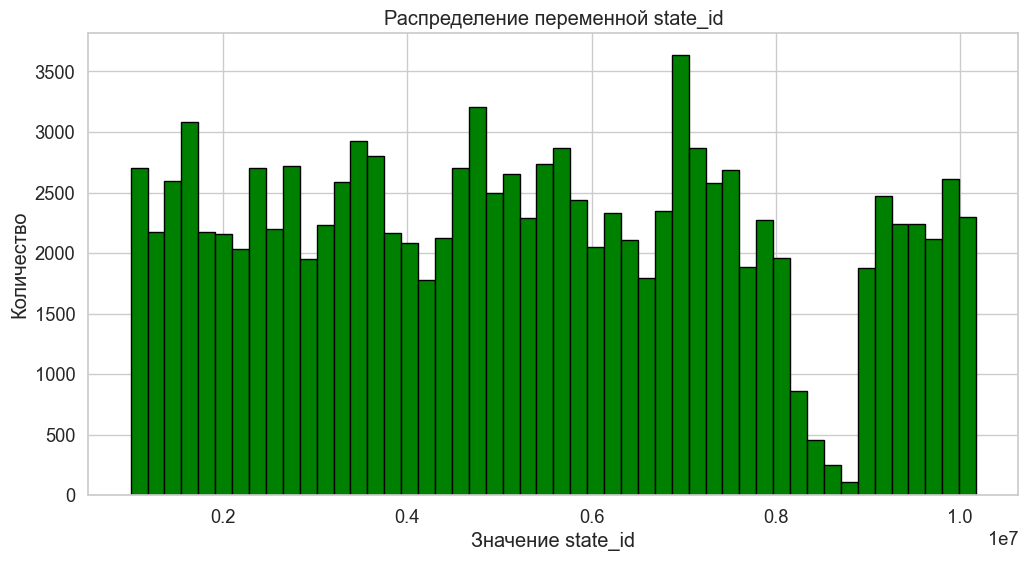

In [498]:
plt.figure(figsize=(12, 6))
plt.hist(motion_sensor_data['state_id'], bins=50, color='green', edgecolor='black')

plt.title('Распределение переменной state_id')
plt.xlabel('Значение state_id')
plt.ylabel('Количество')

plt.show()

Совместное распределение state_id и целевой переменной activation

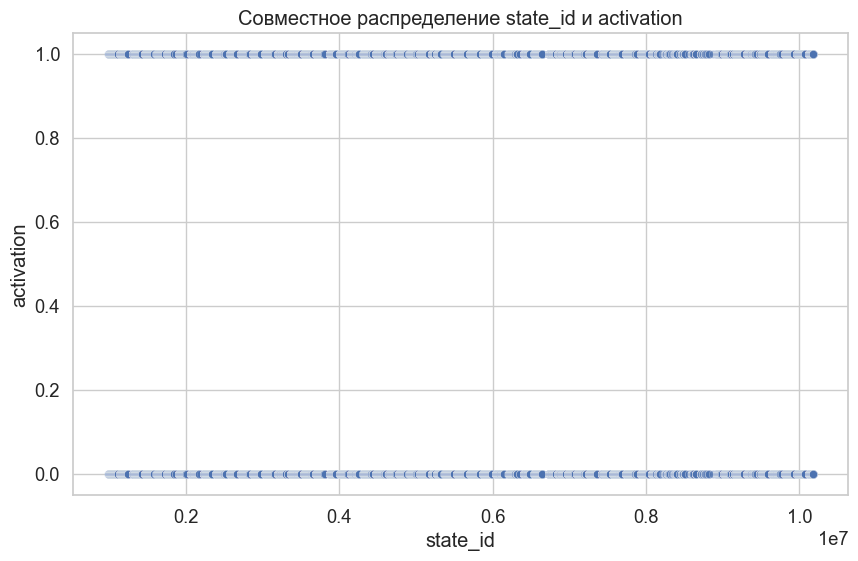

In [499]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='state_id', y='activation', data=motion_sensor_data, alpha=0.2)

plt.title('Совместное распределение state_id и activation')
plt.xlabel('state_id')
plt.ylabel('activation')
plt.show()

Рост значений state_id с течением времени

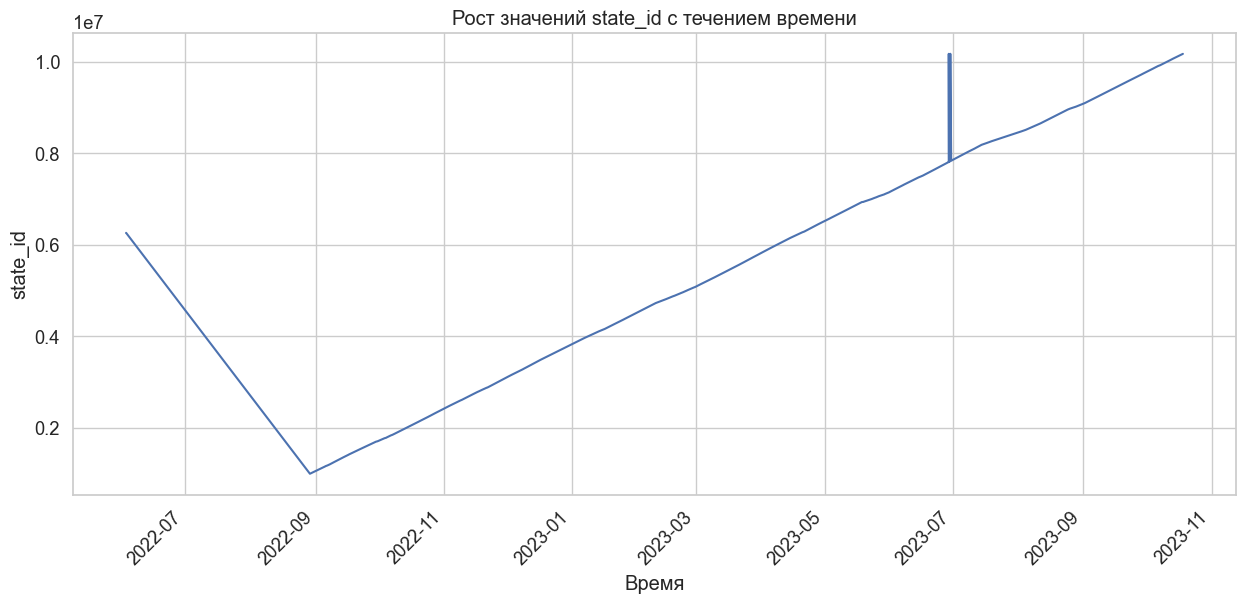

In [500]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='last_updated', y='state_id', data=motion_sensor_data)

plt.title('Рост значений state_id с течением времени')
plt.xlabel('Время')
plt.ylabel('state_id')
plt.xticks(rotation=45, ha='right')
plt.show()

#### state

Визуализация распределения состояний

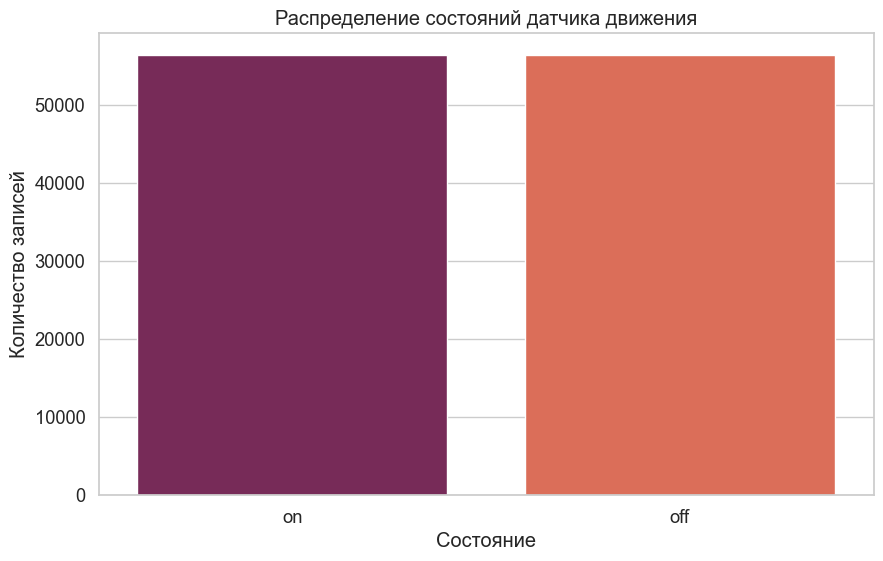

In [501]:
selected_motion_data = motion_sensor_data[motion_sensor_data['state'].isin(['on', 'off'])]
plt.figure(figsize=(10, 6))
sns.countplot(x='state', hue='state', data=selected_motion_data, palette='rocket', legend=False)
plt.xlabel('Состояние')
plt.ylabel('Количество записей')
plt.title('Распределение состояний датчика движения')
plt.show()


Распределение времени для активного и неактивного состояний по часам

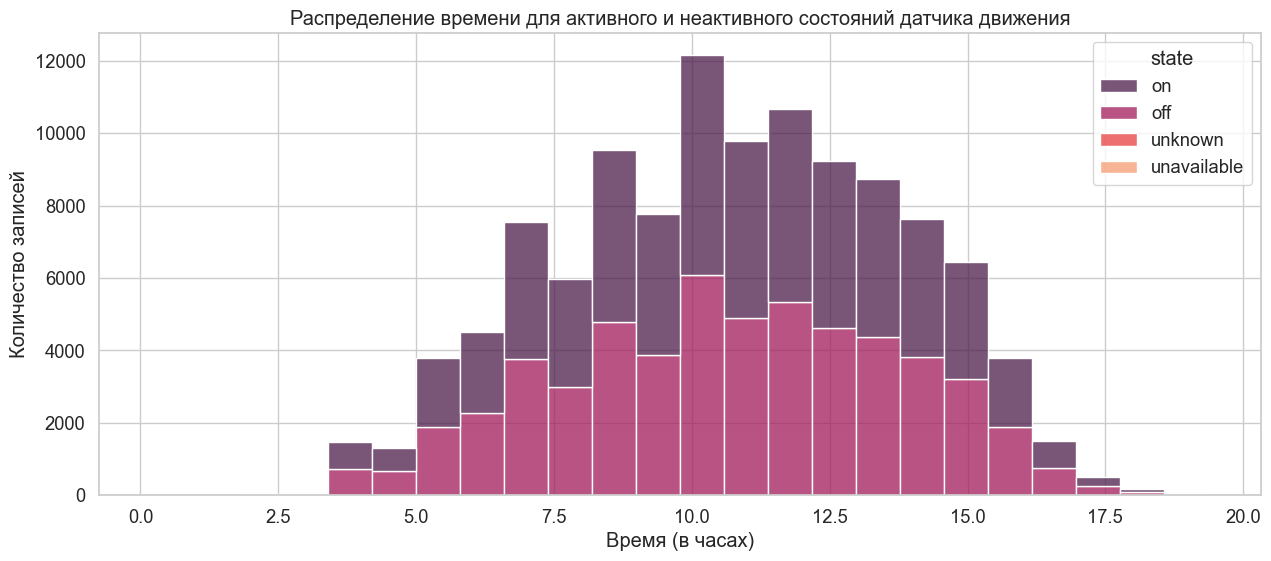

In [502]:
# Создаем новый столбец 'time_hours'
motion_sensor_data['time_hours'] = motion_sensor_data['last_updated'].dt.hour + motion_sensor_data['last_updated'].dt.minute / 60

plt.figure(figsize=(15, 6))

# Строим гистограмму
sns.histplot(x='time_hours', data=motion_sensor_data, hue='state', multiple='stack', palette='rocket', bins=24)

plt.xlabel('Время (в часах)')
plt.ylabel('Количество записей')
plt.title('Распределение времени для активного и неактивного состояний датчика движения')
plt.show()

Распределение активного и неактивного состояния датчика по дням

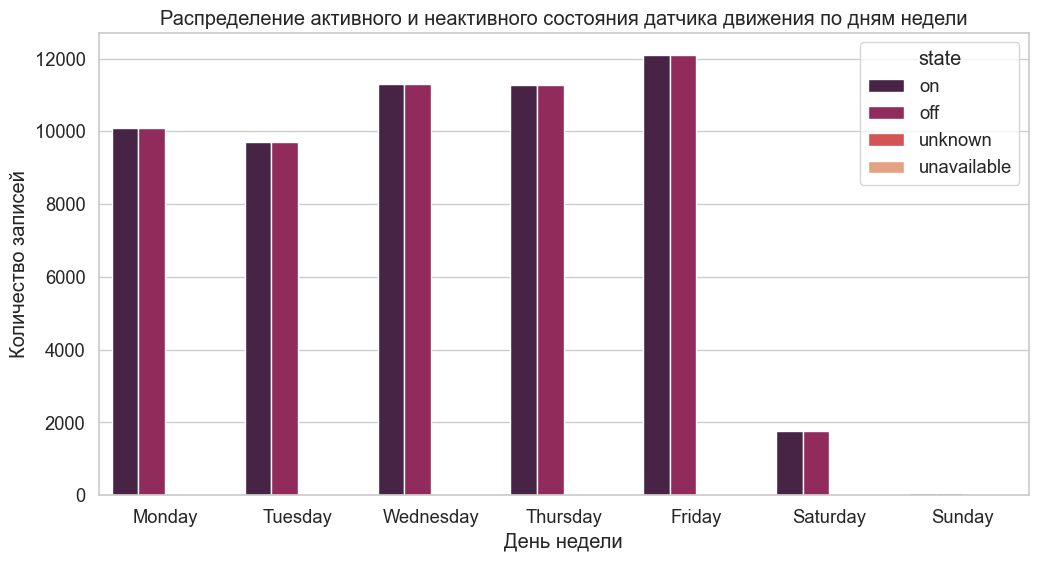

In [503]:
motion_sensor_data['day_of_week'] = pd.to_datetime(motion_sensor_data[['year', 'month', 'day']]).dt.day_name()

plt.figure(figsize=(12, 6))

# Строим гистограмму
sns.countplot(x='day_of_week', data=motion_sensor_data, hue='state', palette='rocket', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.xlabel('День недели')
plt.ylabel('Количество записей')
plt.title('Распределение активного и неактивного состояния датчика движения по дням недели')
plt.show()

Проверка на нормальность

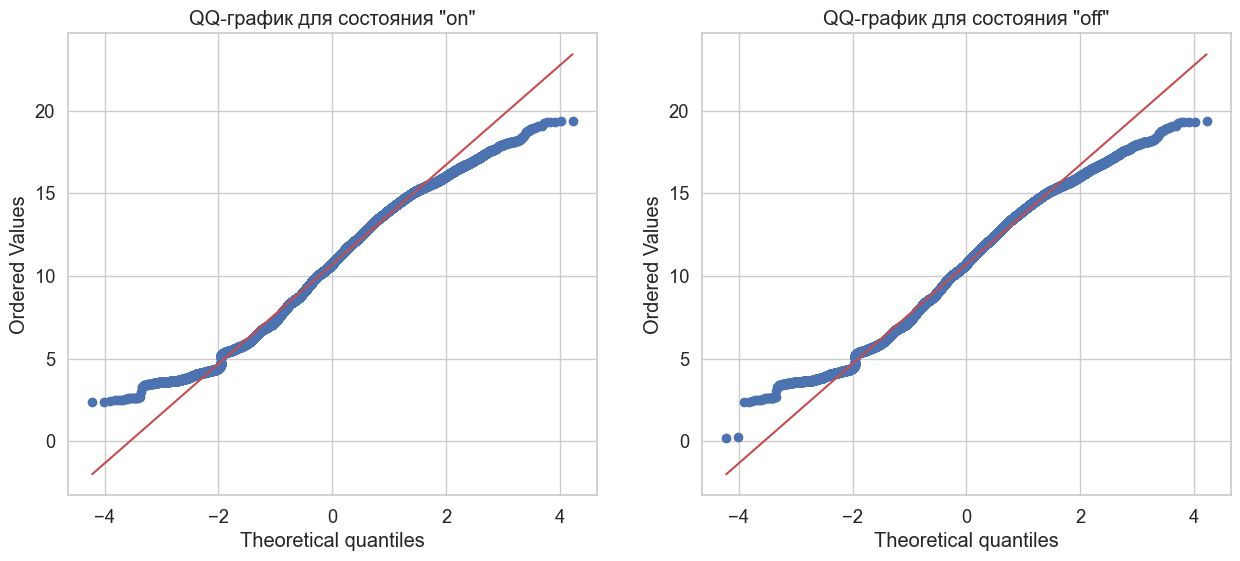

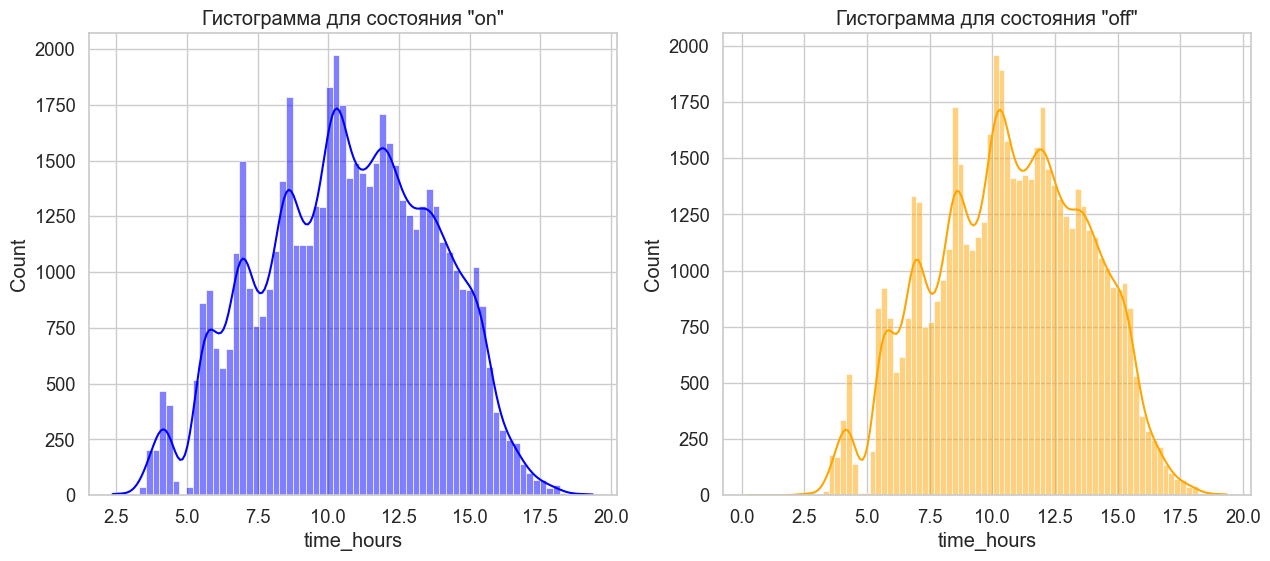

In [504]:
# Создадим отдельные наборы данных для каждого состояния
time_on = motion_sensor_data[motion_sensor_data['activation'] == 1]['time_hours']
time_off = motion_sensor_data[motion_sensor_data['activation'] == 0]['time_hours']

# Построим QQ-графики
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
probplot(time_on, plot=plt)
plt.title('QQ-график для состояния "on"')

plt.subplot(1, 2, 2)
probplot(time_off, plot=plt)
plt.title('QQ-график для состояния "off"')

plt.show()

# Построим гистограммы
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(time_on, kde=True, color='blue')
plt.title('Гистограмма для состояния "on"')

plt.subplot(1, 2, 2)
sns.histplot(time_off, kde=True, color='orange')
plt.title('Гистограмма для состояния "off"')

plt.show()


#### last_update

Визуализация last_updated

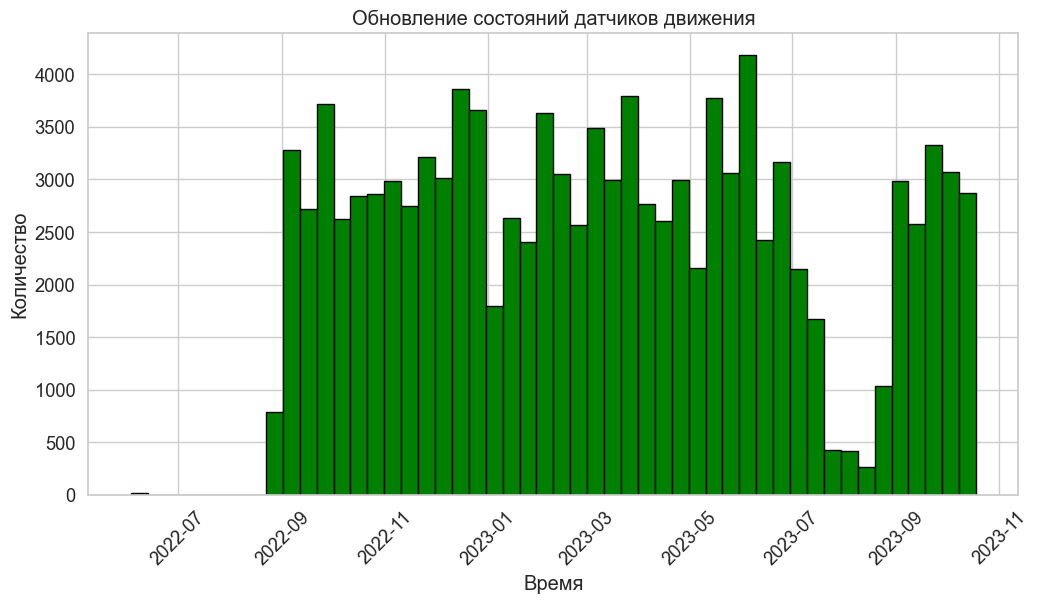

In [505]:
plt.figure(figsize=(12, 6))
motion_sensor_data['last_updated'].hist(bins=50, color='green', edgecolor='black')

plt.title('Обновление состояний датчиков движения')
plt.xlabel('Время')
plt.ylabel('Количество')
plt.xticks(rotation=45)

plt.show()

Совместное распределение last_update и целевой переменной activation

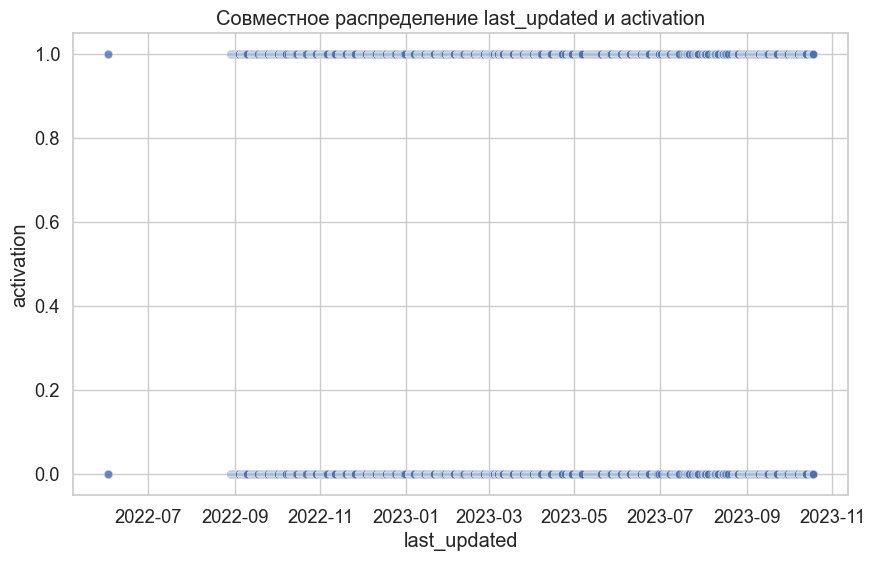

In [506]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='last_updated', y='activation', data=motion_sensor_data, alpha=0.2)

plt.title('Совместное распределение last_updated и activation')
plt.xlabel('last_updated')
plt.ylabel('activation')
plt.show()

Распределение времени для каждого датчика состояния

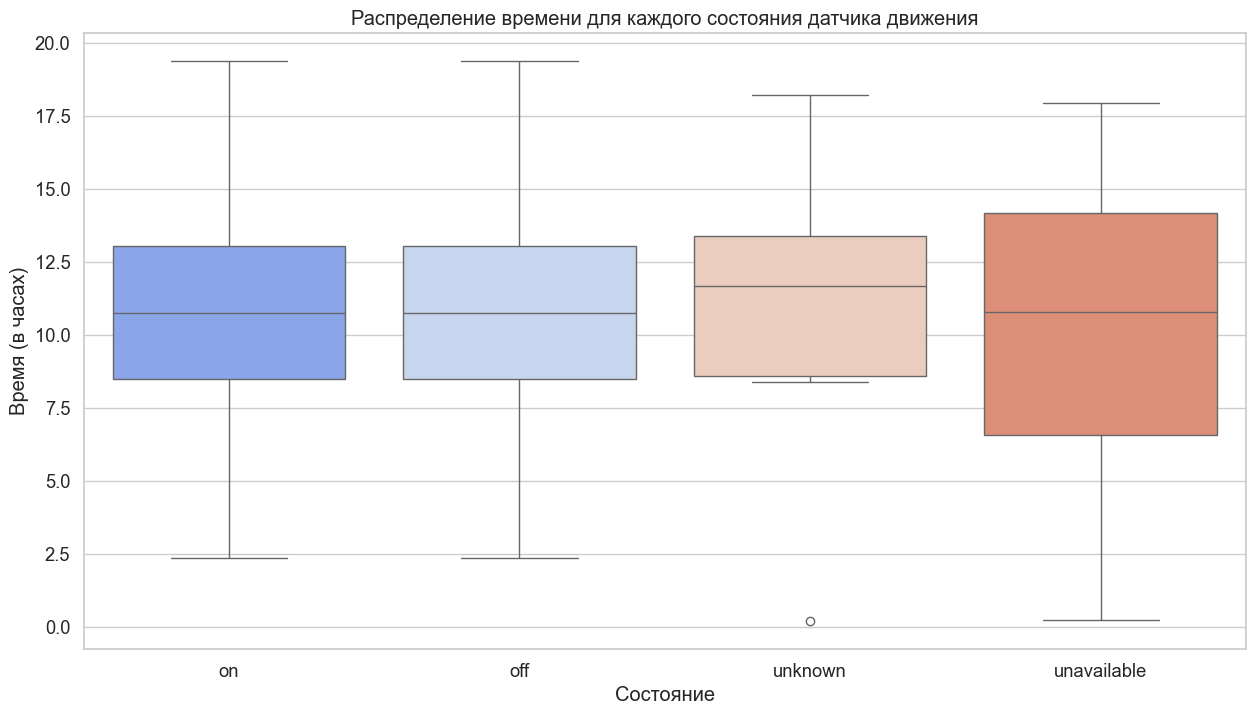

In [507]:
plt.figure(figsize=(15, 8))

# Используем boxplot для визуализации распределения времени для каждого состояния
sns.boxplot(x='state', y='time_hours', data=motion_sensor_data, palette='coolwarm', hue='state', dodge=False)

plt.xlabel('Состояние')
plt.ylabel('Время (в часах)')
plt.title('Распределение времени для каждого состояния датчика движения')
plt.show()

#### old_state_id

Визуализация old_state_id

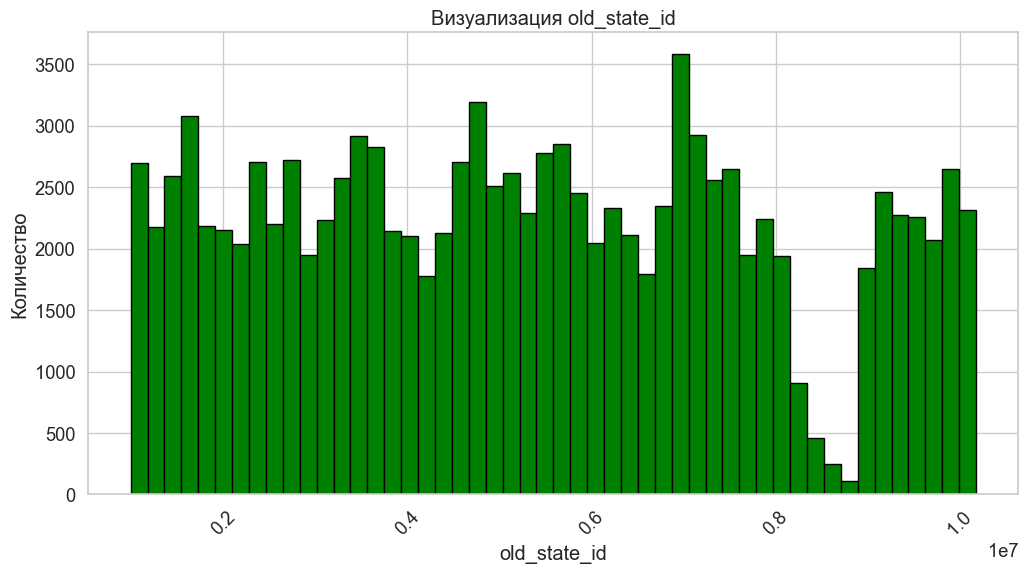

In [508]:
plt.figure(figsize=(12, 6))
motion_sensor_data['old_state_id'].hist(bins=50, color='green', edgecolor='black')

plt.title('Визуализация old_state_id')
plt.xlabel('old_state_id')
plt.ylabel('Количество')
plt.xticks(rotation=45)

plt.show()

Совместное распределение old_state_id и целевой переменной activation

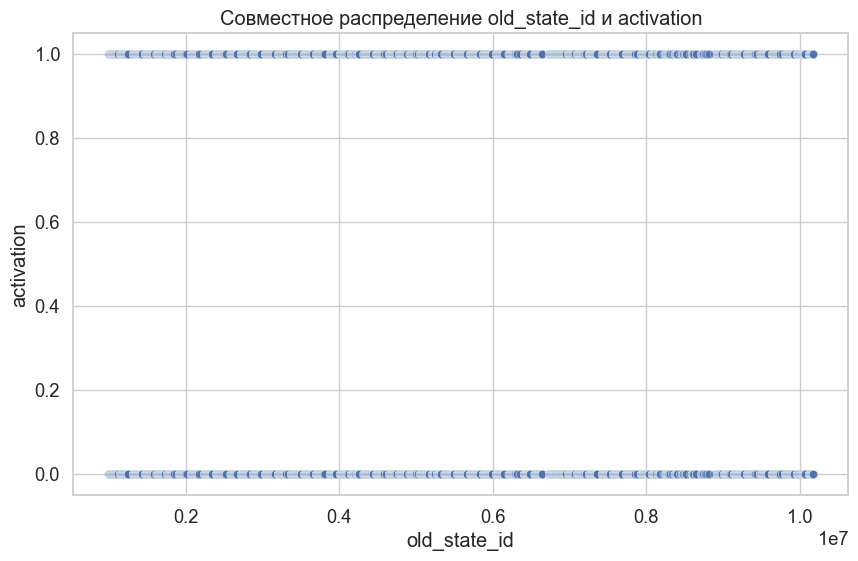

In [509]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='old_state_id', y='activation', data=motion_sensor_data, alpha=0.2)

plt.title('Совместное распределение old_state_id и activation')
plt.xlabel('old_state_id')
plt.ylabel('activation')
plt.show()

Матрица корреляции числовых признаков

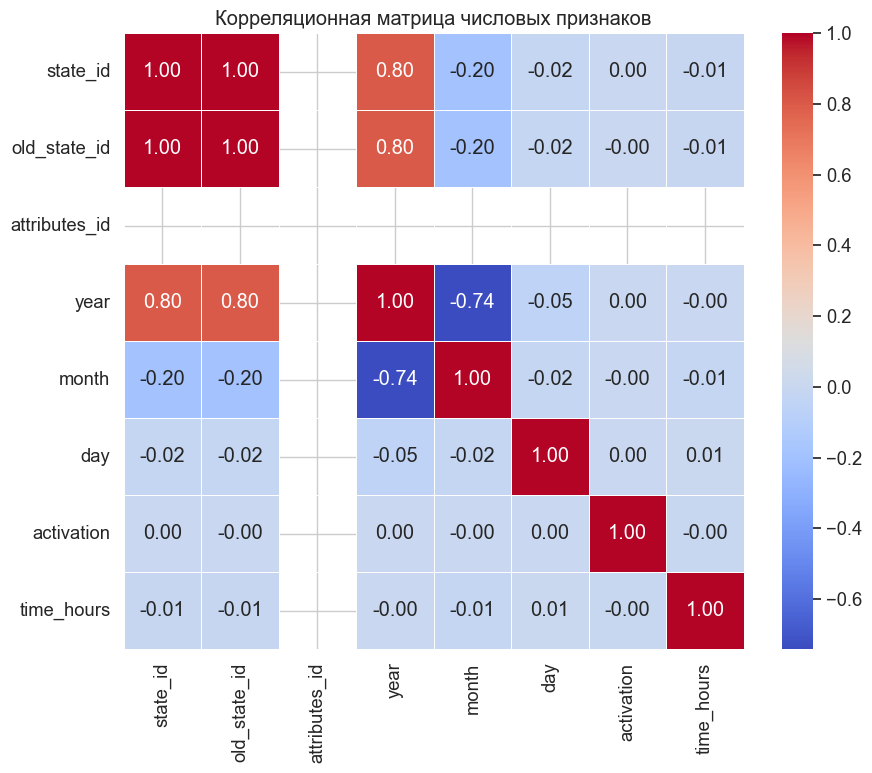

In [510]:
# Выберем только числовые столбцы
numeric_columns = motion_sensor_data.select_dtypes(include=['number'])

# Построим матрицу корреляции
correlation_matrix = numeric_columns.corr()

# Построим тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Корреляционная матрица числовых признаков')
plt.show()


### Для датчика двери

Визуализация распределения состояний

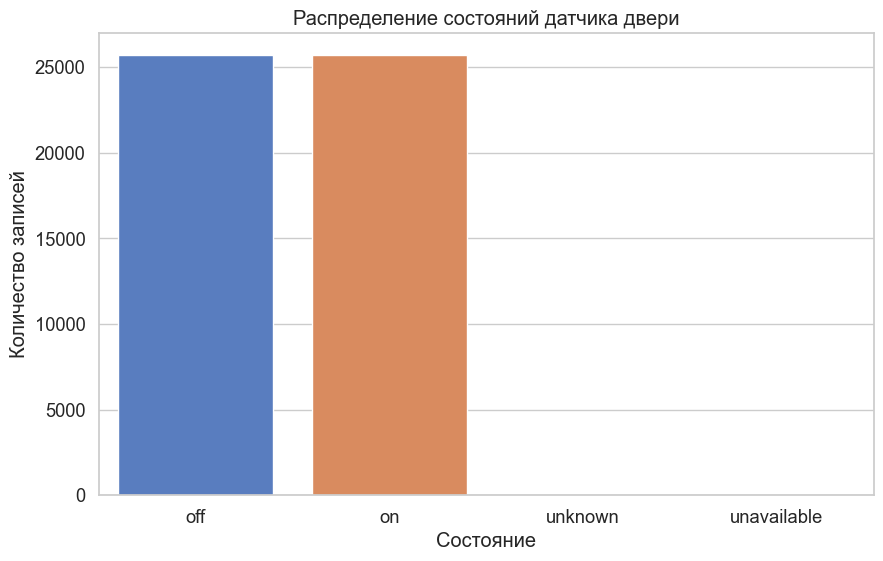

In [511]:
plt.figure(figsize=(10, 6))
sns.countplot(x='state', hue='state', data=door_sensor_data, palette='muted', legend=False)
plt.xlabel('Состояние')
plt.ylabel('Количество записей')
plt.title('Распределение состояний датчика двери')
plt.show()


Распределение времени на различных состояниях датчика

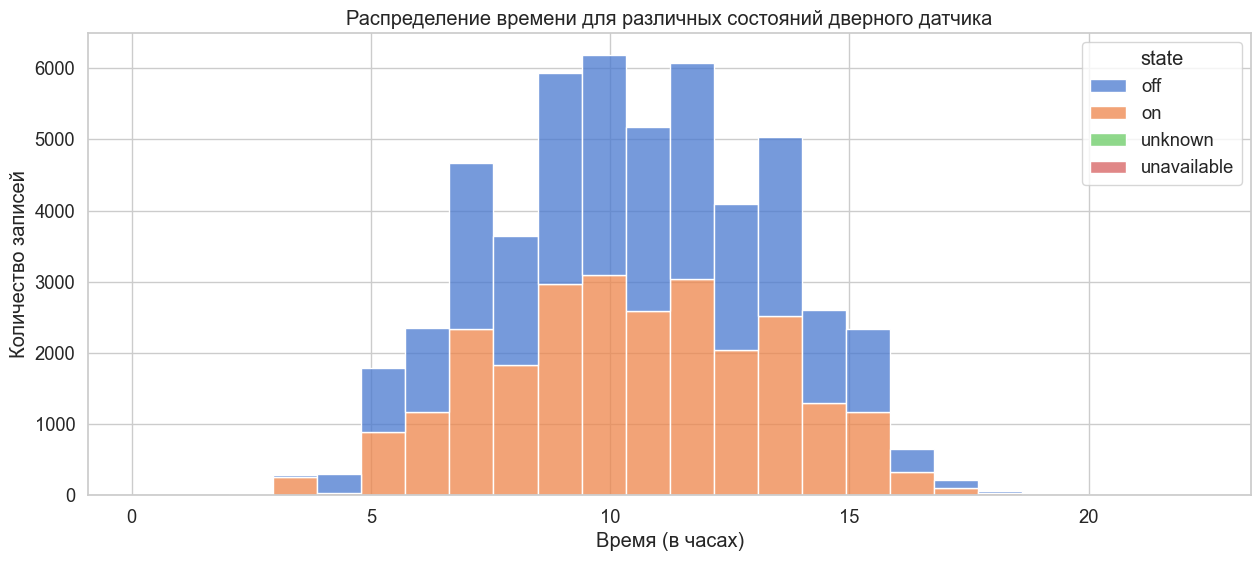

In [512]:
# Создаем новый столбец 'time_hours' для дверного датчика
door_sensor_data['time_hours'] = door_sensor_data['last_updated'].dt.hour + door_sensor_data['last_updated'].dt.minute / 60

plt.figure(figsize=(15, 6))

# Строим гистограмму
sns.histplot(x='time_hours', data=door_sensor_data, hue='state', multiple='stack', palette='muted', bins=24)

plt.xlabel('Время (в часах)')
plt.ylabel('Количество записей')
plt.title('Распределение времени для различных состояний дверного датчика')
plt.show()


Распределение открытий двери по дням в течении года

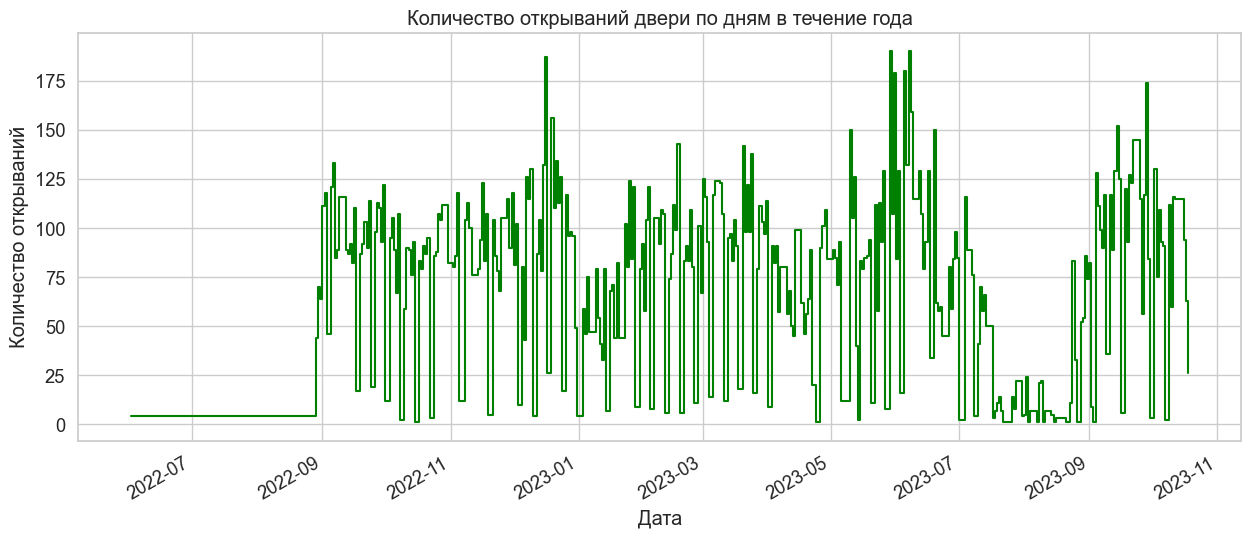

In [513]:
door_sensor_data['date'] = pd.to_datetime(door_sensor_data[['year', 'month', 'day']])

plt.figure(figsize=(15, 6))

# Фильтруем данные по состоянию "on"
door_open_data = door_sensor_data[door_sensor_data['state'] == 'on']

# Группируем данные по дням и считаем количество открываний
door_open_count = door_open_data.groupby('date').size()

# Строим график без точек (линия)
door_open_count.plot(drawstyle='steps-post', color='green')

plt.xlabel('Дата')
plt.ylabel('Количество открываний')
plt.title('Количество открываний двери по дням в течение года')
plt.show()


Корреляционная матрица

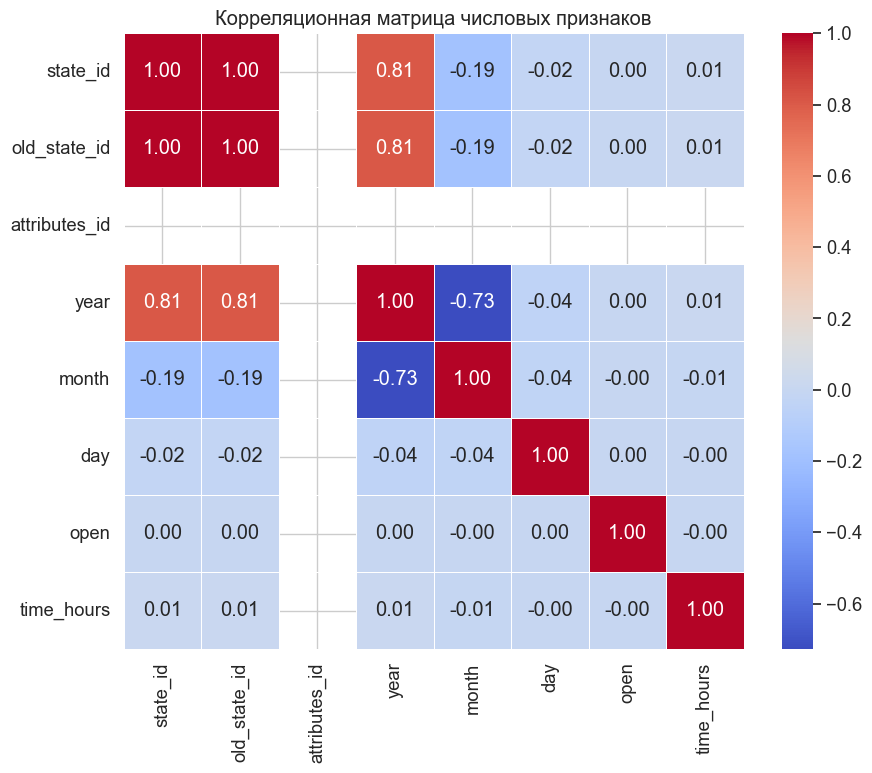

In [514]:
# Выберем только числовые столбцы
numeric_columns2 = door_sensor_data.select_dtypes(include=['number'])

# Построим матрицу корреляции
correlation_matrix = numeric_columns2.corr()

# Построим тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Корреляционная матрица числовых признаков')
plt.show()


Распределение времени для состояний датчика двери

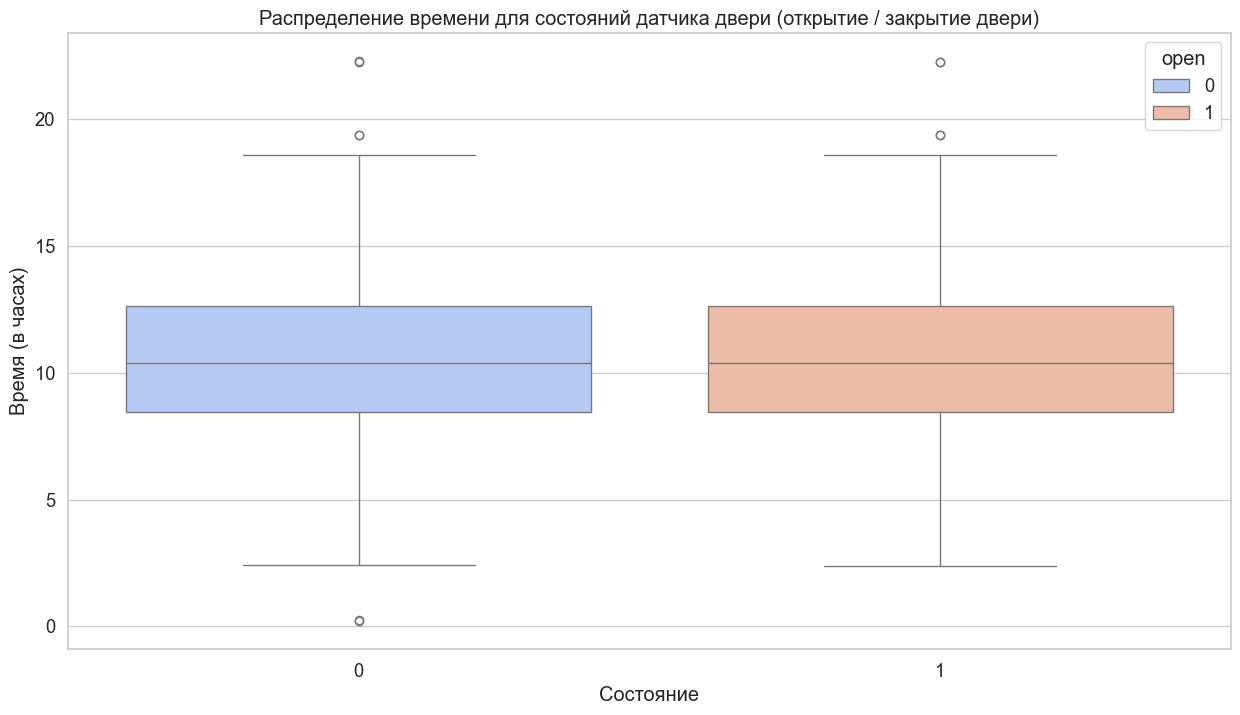

In [515]:
door_sensor_data['time_hours'] = door_sensor_data['last_updated'].dt.hour + door_sensor_data['last_updated'].dt.minute / 60

plt.figure(figsize=(15, 8))

# Используем boxplot для визуализации распределения времени для каждого состояния
sns.boxplot(x='open', y='time_hours', data=door_sensor_data, palette='coolwarm', hue='open', dodge=False)

plt.xlabel('Состояние')
plt.ylabel('Время (в часах)')
plt.title('Распределение времени для состояний датчика двери (открытие / закрытие двери)')
plt.show()

Проверка на нормальность

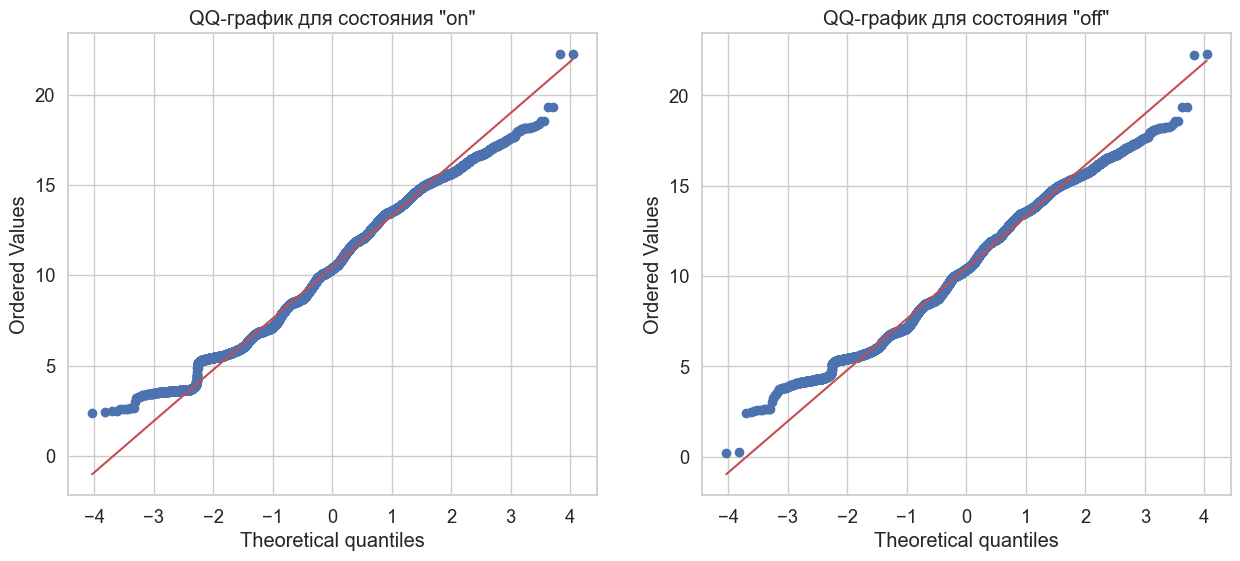

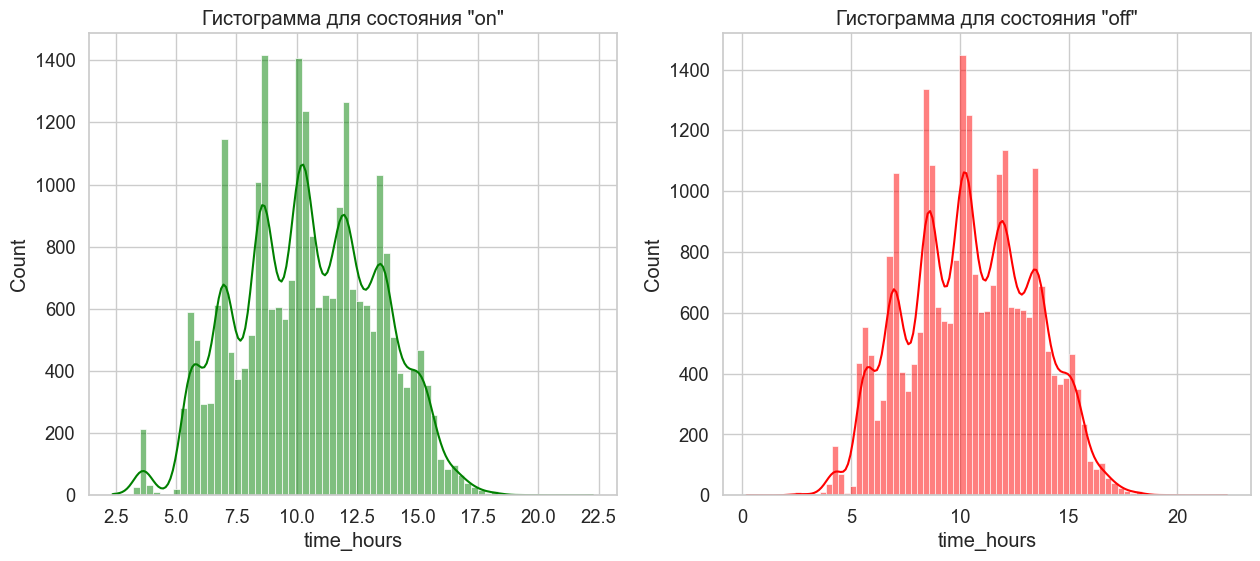

In [516]:
# Создадим отдельные наборы данных для каждого состояния
time_on = door_sensor_data[door_sensor_data['open'] == 1]['time_hours']
time_off = door_sensor_data[door_sensor_data['open'] == 0]['time_hours']

# Построим QQ-графики
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
probplot(time_on, plot=plt)
plt.title('QQ-график для состояния "on"')

plt.subplot(1, 2, 2)
probplot(time_off, plot=plt)
plt.title('QQ-график для состояния "off"')

plt.show()

# Построим гистограммы
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(time_on, kde=True, color='green')
plt.title('Гистограмма для состояния "on"')

plt.subplot(1, 2, 2)
sns.histplot(time_off, kde=True, color='red')
plt.title('Гистограмма для состояния "off"')

plt.show()


*Исходя из графиков, можно сделать вывод, что перед нами нормальное распределение*

 ### Для датчика окна

Визуализация распределения состояний

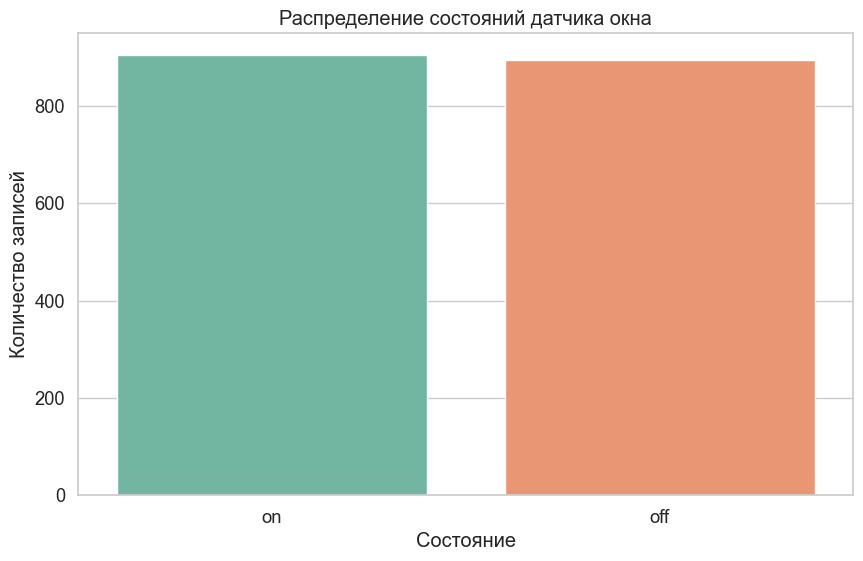

In [517]:
selected_window_data = window_sensor_data[window_sensor_data['state'].isin(['on', 'off'])]
plt.figure(figsize=(10, 6))
sns.countplot(x='state', hue='state', data=selected_window_data, palette='Set2', legend=False)
plt.xlabel('Состояние')
plt.ylabel('Количество записей')
plt.title('Распределение состояний датчика окна')
plt.show()

Распределение времени для открытого и закрытого окна

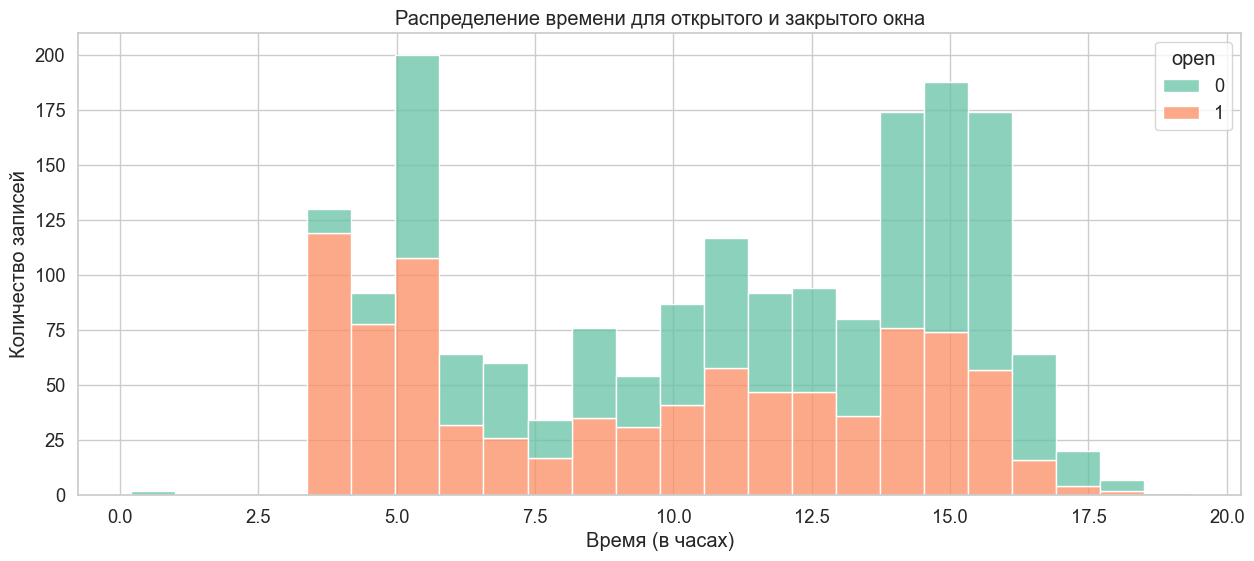

In [518]:
# Создаем новый столбец 'time_hours'
window_sensor_data['time_hours'] = window_sensor_data['last_updated'].dt.hour + window_sensor_data['last_updated'].dt.minute / 60

plt.figure(figsize=(15, 6))

# Строим гистограмму
sns.histplot(x='time_hours', data=window_sensor_data, hue='open', multiple='stack', palette='Set2', bins=24)

plt.xlabel('Время (в часах)')
plt.ylabel('Количество записей')
plt.title('Распределение времени для открытого и закрытого окна')
plt.show()

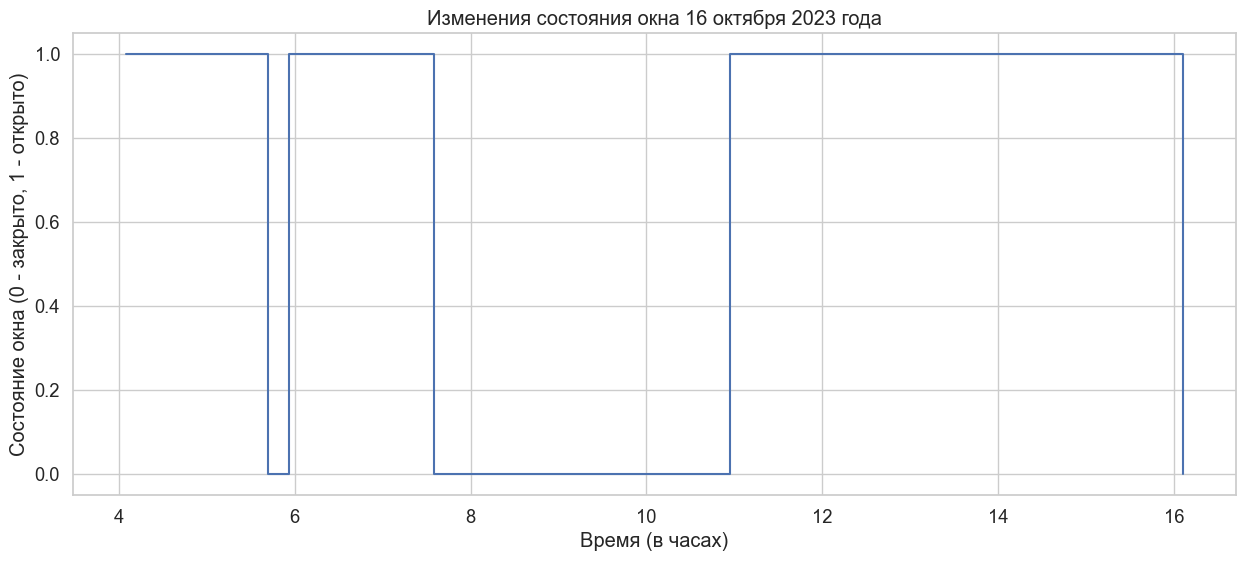

In [523]:
selected_data = window_sensor_data[(window_sensor_data['year'] == 2023) & (window_sensor_data['month'] == 10) & (window_sensor_data['day'] == 16)].copy()

# Строим график
plt.figure(figsize=(15, 6))
plt.step(selected_data['time_hours'], selected_data['open'], where='post', color='b')
plt.xlabel('Время (в часах)')
plt.ylabel('Состояние окна (0 - закрыто, 1 - открыто)')
plt.title('Изменения состояния окна 16 октября 2023 года')
plt.show()


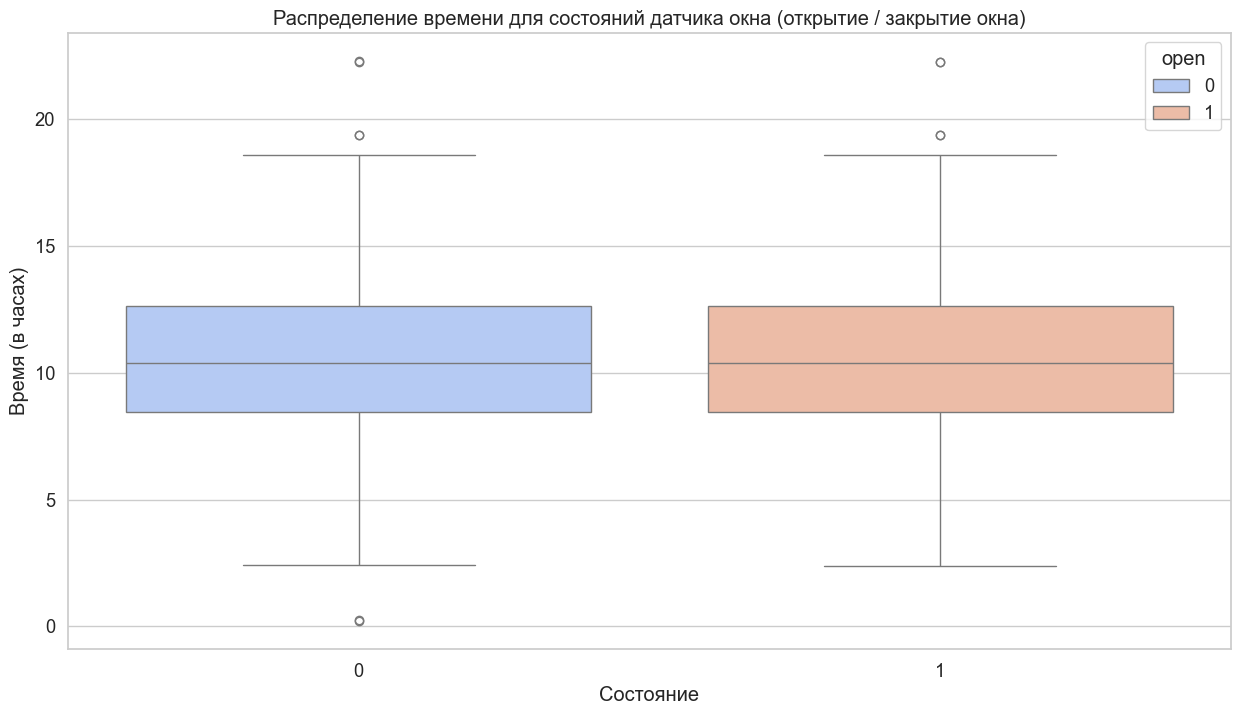

In [520]:
plt.figure(figsize=(15, 8))

# Используем boxplot для визуализации распределения времени для каждого состояния
sns.boxplot(x='open', y='time_hours', data=door_sensor_data, palette='coolwarm', hue='open', dodge=False)

plt.xlabel('Состояние')
plt.ylabel('Время (в часах)')
plt.title('Распределение времени для состояний датчика окна (открытие / закрытие окна)')
plt.show()

Корреляционная матрица

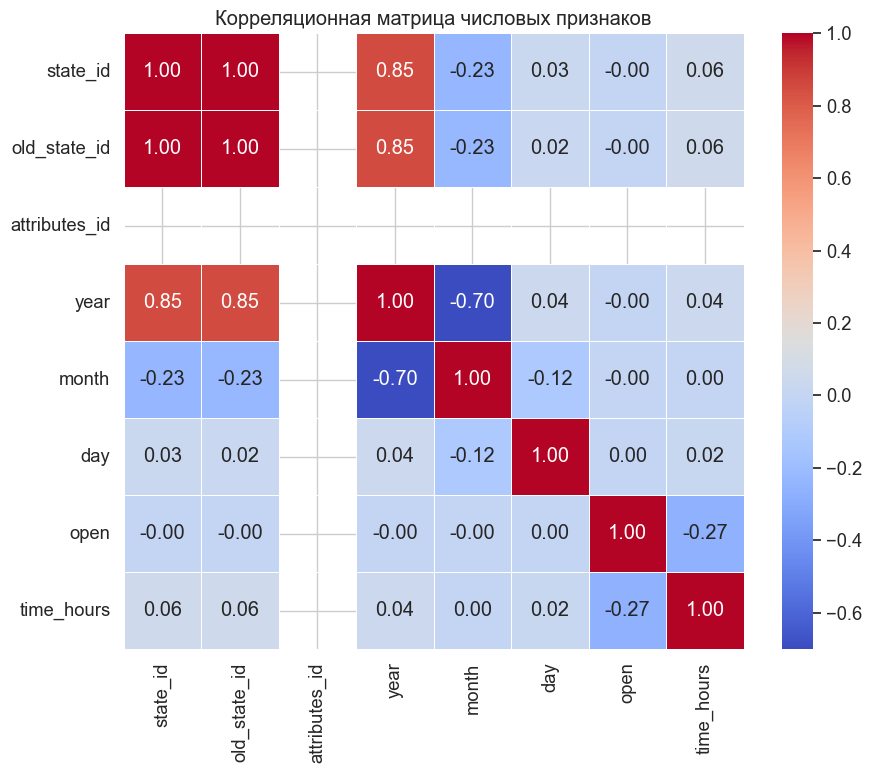

In [521]:
# Выберем только числовые столбцы
numeric_columns3 = window_sensor_data.select_dtypes(include=['number'])

# Построим матрицу корреляции
correlation_matrix = numeric_columns3.corr()

# Построим тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Корреляционная матрица числовых признаков')
plt.show()


Проверка на нормальность

2025        3.516667
3893        5.583333
3900        5.583333
12625      15.216667
12684      15.266667
             ...    
9158356     5.566667
9160216     7.433333
9162934    10.133333
9184929     0.250000
9185790    17.950000
Name: time_hours, Length: 1810, dtype: float64


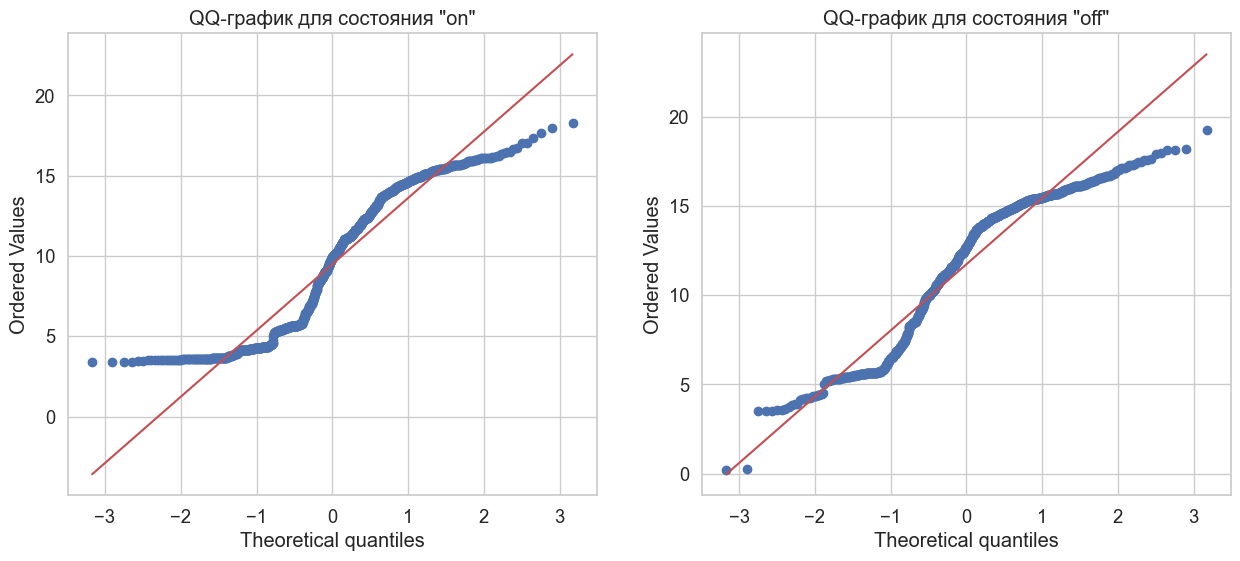

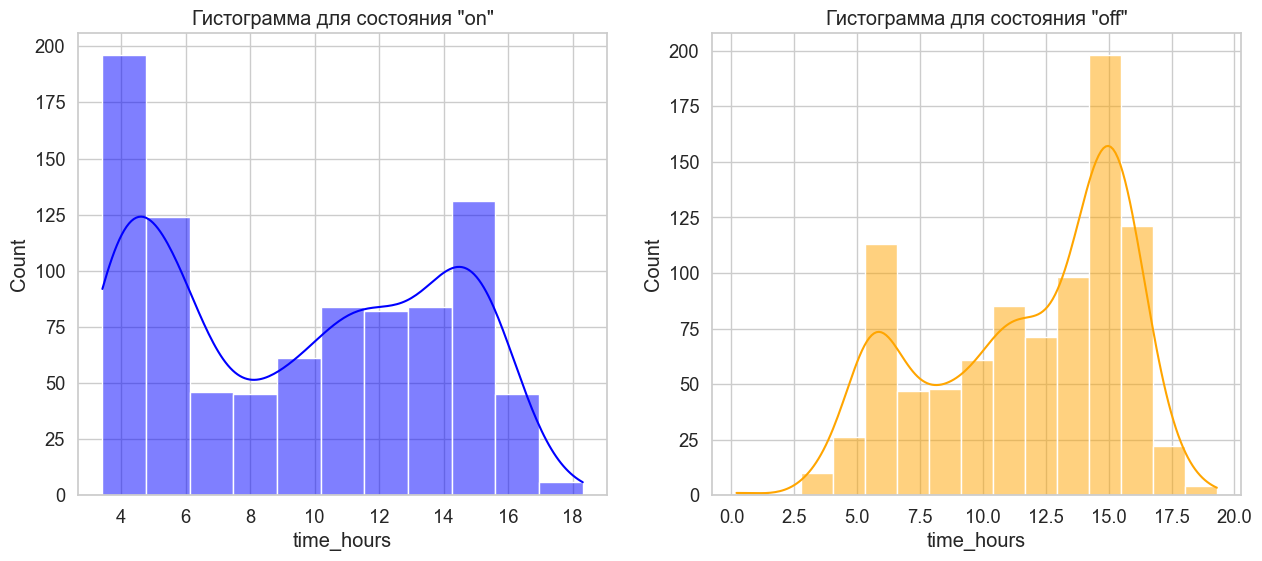

In [522]:
# Создадим отдельные наборы данных для каждого состояния
time_on = window_sensor_data[window_sensor_data['open'] == 1]['time_hours']
time_off = window_sensor_data[window_sensor_data['open'] == 0]['time_hours']

print(window_sensor_data['time_hours'])
# Построим QQ-графики
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
probplot(time_on, plot=plt)
plt.title('QQ-график для состояния "on"')

plt.subplot(1, 2, 2)
probplot(time_off, plot=plt)
plt.title('QQ-график для состояния "off"')

plt.show()

# Построим гистограммы
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(time_on, kde=True, color='blue')
plt.title('Гистограмма для состояния "on"')

plt.subplot(1, 2, 2)
sns.histplot(time_off, kde=True, color='orange')
plt.title('Гистограмма для состояния "off"')

plt.show()

### Ненужные значения

Ненужными (бесполезными) оказались два значения: attributes_id и context_id. 
* attributes_id - представляет собой номер атрибута (датчика) и является константой.
* context_id - идетификатор, возможно связанный с каким-то обновлением.

Сами по себе attributes_id и context_id не несут полезной информации, из-за того, что attributes_id значение предназначено для связи таблицы с другими таблицами в базе данных, а context_id может быть анализирован в совокупности с context_user_id и context_parent_id, которые в таблице оказались пустыми.